In [1]:
#import all libraries
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import html
import matplotlib.pyplot as plt
import seaborn as sns 
import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import display
from ipywidgets import interact, interact_manual
import re
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf
from statsmodels.regression.linear_model import OLS
from sklearn.linear_model import LinearRegression
from matplotlib import rcParams
import math
from math import sqrt
from sklearn.metrics import mean_squared_error
from random import random
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
import itertools
import statsmodels.api as sm
# import pmdarima as pm
from matplotlib import pyplot
import operator
import warnings
warnings.filterwarnings('ignore')
import datetime as dt

### Future reference and useful codes
- import warnings
- warnings.filterwarnings('ignore')
- pd.set_options('display.max_columns', 50)
- pd.set_options('display.max_rows', 100)
- https://stackoverflow.com/questions/27309243/python-statsmodels-arima-linalgerror-svd-did-not-converge

In [2]:
df = pd.read_csv(r'C:\Users\Deepika\OneDrive\Documents\Professional\owid-covid-data.csv')

In [3]:
df = df[['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases','total_deaths', 'new_deaths','reproduction_rate', 'icu_patients',
         'hosp_patients','new_tests', 'total_tests','positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations','stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index']]

In [4]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
def analyse_df(df):
    df['case_rate'] = (df['total_cases']/df['population'])*100
    df['death_rate'] = (df['total_deaths']/df['population'])*100
    df['test_rate'] = (df['total_tests']/df['population'])*100
    df['admissions_rate'] = (df['hosp_patients']/df['population'])*100
    df['critical_rate'] = (df['icu_patients']/df['population'])*100
    df['vaccination_rate'] = (df['people_fully_vaccinated']/df['population'])*100
    print('Columns: ', df.columns)
    print('Dataframe shape: ', df.shape)
    print('Date Range', df['date'].min(),df['date'].max())
    stats_df = df.groupby('location')[['date','case_rate','death_rate','test_rate','vaccination_rate',
                    'admissions_rate','critical_rate','stringency_index',
                                 'population']].agg({"date":['max', 'count'],
                    'case_rate':'max','death_rate':'max','test_rate':'max','vaccination_rate':'max',
                    'admissions_rate':'mean','critical_rate':'mean','stringency_index':'mean','population':'mean'})
    display(stats_df)
    display(df.corr())
    sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True)
    plt.xticks(rotation=45)
    rcParams['figure.figsize'] = 12,8
    return df, stats_df

Columns:  Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'reproduction_rate', 'icu_patients',
       'hosp_patients', 'new_tests', 'total_tests', 'positive_rate',
       'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index', 'case_rate', 'death_rate',
       'test_rate', 'admissions_rate', 'critical_rate', 'vaccination_rate'],
      dtype='object')
Dataframe shape:  (80735, 42)
Date Range 2020-01-01 00:00:00 2021-04-10 00:00:00


date        case_rate death_rate   test_rate  \
                   max count        max        max         max   
location                                                         
Afghanistan 2021-04-10   412   0.146793   0.006476         NaN   
Africa      2021-04-10   423   0.323774   0.008610         NaN   
Albania     2021-04-10   411   4.453228   0.080270   19.298631   
Algeria     2021-04-10   411   0.269955   0.007129         NaN   
Andorra     2021-04-10   405  16.174206   0.155310  221.943959   
...                ...   ...        ...        ...         ...   
Vietnam     2021-04-10   444   0.002766   0.000036    2.550173   
World       2021-04-10   445   1.736490   0.037561         NaN   
Yemen       2021-04-10   366   0.017689   0.003457         NaN   
Zambia      2021-04-10   389   0.489111   0.006669    6.998961   
Zimbabwe    2021-04-10   387   0.250778   0.010348    3.022716   

            vaccination_rate admissions_rate critical_rate stringency_index  \
                         max            mean          mean             mean   
location                                                                      
Afghanistan              NaN             NaN           NaN        39.125858   
Africa              0.333069             NaN           NaN              NaN   
Albania             0.022760             NaN           NaN        63.599926   
Algeria                  NaN             NaN           NaN        71.340345   
Andorra             1.637223             NaN           NaN        48.075725   
...                      ...             ...           ...              ...   
Vietnam                  NaN             NaN           NaN        61.086856   
World               2.094670             NaN           NaN              NaN   
Yemen                    NaN             NaN           NaN        33.822936   
Zambia                   NaN             NaN           NaN        46.129105   
Zimbabwe            0.176136             NaN           NaN        75.069535   

               population  
                     mean  
location                   
Afghanistan  3.892834e+07  
Africa       1.340598e+09  
Albania      2.877800e+06  
Algeria      4.385104e+07  
Andorra      7.726500e+04  
...                   ...  
Vietnam      9.733858e+07  
World        7.794799e+09  
Yemen        2.982597e+07  
Zambia       1.838396e+07  
Zimbabwe     1.486293e+07  

[215 rows x 10 columns]

,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,icu_patients,hosp_patients,new_tests,total_tests,positive_rate,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,case_rate,death_rate,test_rate,admissions_rate,critical_rate,vaccination_rate
total_cases,1.000000,0.879623,0.985441,0.843590,-0.001331,0.818865,0.774570,0.808881,0.960289,0.019445,...,0.030334,-0.007374,0.021261,0.036942,0.137041,0.161490,0.132985,0.109855,0.228548,-0.069238
new_cases,0.879623,1.000000,0.896819,0.927735,0.013728,0.931340,0.909323,0.836041,0.725914,0.088957,...,0.034262,-0.004094,0.026751,0.044692,0.107269,0.132308,0.090728,0.179862,0.299284,-0.095544
total_deaths,0.985441,0.896819,1.000000,0.876279,-0.001880,0.832126,0.805538,0.792417,0.884262,0.070557,...,0.039939,-0.011125,0.026273,0.041861,0.122529,0.177417,0.110284,0.115928,0.215877,-0.078225
new_deaths,0.843590,0.927735,0.876279,1.000000,0.004317,0.904747,0.912065,0.711123,0.614894,0.174685,...,0.044331,-0.006283,0.028066,0.046115,0.092142,0.139932,0.058022,0.248795,0.357662,-0.105517
reproduction_rate,-0.001331,0.013728,-0.001880,0.004317,1.000000,-0.082573,-0.085777,-0.031209,-0.043681,0.087655,...,0.116230,0.070320,0.137909,0.148595,-0.017461,-0.031440,-0.070076,-0.152274,-0.201713,-0.184617
icu_patients,0.818865,0.931340,0.832126,0.904747,-0.082573,1.000000,0.960731,0.865160,0.836779,0.139225,...,NaN,-0.072443,-0.115623,0.061555,0.248839,0.265738,0.045887,0.221560,0.352828,-0.043817
hosp_patients,0.774570,0.909323,0.805538,0.912065,-0.085777,0.960731,1.000000,0.820843,0.795278,0.219044,...,NaN,-0.095153,-0.013827,0.018089,0.278155,0.343990,0.054936,0.321462,0.394163,-0.056168
new_tests,0.808881,0.836041,0.792417,0.711123,-0.031209,0.865160,0.820843,1.000000,0.856846,-0.055736,...,0.033455,-0.004552,0.067171,0.122935,0.214286,0.234845,0.193755,0.102638,0.224028,0.022024
total_tests,0.960289,0.725914,0.884262,0.614894,-0.043681,0.836779,0.795278,0.856846,1.000000,-0.048298,...,0.024130,-0.013751,0.039327,0.091180,0.250066,0.240904,0.196184,0.072750,0.237561,0.068320
positive_rate,0.019445,0.088957,0.070557,0.174685,0.087655,0.139225,0.219044,-0.055736,-0.048298,1.000000,...,0.132433,-0.118154,-0.091269,-0.115954,0.170903,0.232465,-0.136881,0.753085,0.694715,-0.120292


(      iso_code continent     location       date  total_cases  new_cases  \
 0          AFG      Asia  Afghanistan 2020-02-24          1.0        1.0   
 1          AFG      Asia  Afghanistan 2020-02-25          1.0        0.0   
 2          AFG      Asia  Afghanistan 2020-02-26          1.0        0.0   
 3          AFG      Asia  Afghanistan 2020-02-27          1.0        0.0   
 4          AFG      Asia  Afghanistan 2020-02-28          1.0        0.0   
 ...        ...       ...          ...        ...          ...        ...   
 80730      ZWE    Africa     Zimbabwe 2021-04-06      36966.0       32.0   
 80731      ZWE    Africa     Zimbabwe 2021-04-07      36984.0       18.0   
 80732      ZWE    Africa     Zimbabwe 2021-04-08      37052.0       68.0   
 80733      ZWE    Africa     Zimbabwe 2021-04-09      37147.0       95.0   
 80734      ZWE    Africa     Zimbabwe 2021-04-10      37273.0      126.0   
 
        total_deaths  new_deaths  reproduction_rate  icu_patients  ...  \


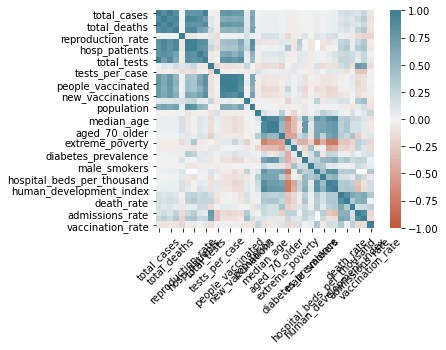

In [7]:
analyse_df(df)
stats_df = analyse_df(df)[1]

In [201]:
stats_df.to_excel(r'C:\Users\Deepika\OneDrive\Documents\Professional\stats_df.xlsx')

In [232]:
df_grouped = df.groupby(['iso_code','continent','location'])

In [234]:
def poly(name, group): # build poly function
    group['date_transformed'] = group['date'].map(dt.datetime.toordinal) # transform date column into integer to be able to build model
    Range = group['date_transformed'].max() + round(len(group)/2) + 10 
    predict_dates = list(range(group['date_transformed'].max() + 1, Range)) # create a range of dates to make future predictions
    x = group['date_transformed'].values[:,np.newaxis] # input data transformed
    y = group['vaccination_rate'].values # input train data
    polynomial_features = PolynomialFeatures(degree=2) 
    x_poly = polynomial_features.fit_transform(x)
    model = LinearRegression() 
    model.fit(x_poly, y) # fit poly model for predictions
    y_poly_pred = model.predict(x_poly)
    rmse = np.sqrt(mean_squared_error(y,y_poly_pred)) # accuracy stats
    r2 = r2_score(y,y_poly_pred)
    group['Pred'] = y_poly_pred # saves test predictions in column of dataframe
    group_export = group[['date','vaccination_rate','Pred']].set_index('date') # create new df with actual and predictions to compare 
    print(name)
    print('rmse: ', rmse)
    print('r2: ', r2)
    return model, polynomial_features, predict_dates, group_export

('ARG', 'South America', 'Argentina')
rmse:  0.07998685646892564
r2:  0.9735849930440627
('ARG', 'South America', 'Argentina')
rmse:  0.07998685646892564
r2:  0.9735849930440627
('ARG', 'South America', 'Argentina')
rmse:  0.07998685646892564
r2:  0.9735849930440627
('ARG', 'South America', 'Argentina')
rmse:  0.07998685646892564
r2:  0.9735849930440627
Observations in Actual Data = 76.000000, Predicted Observations=47.000000


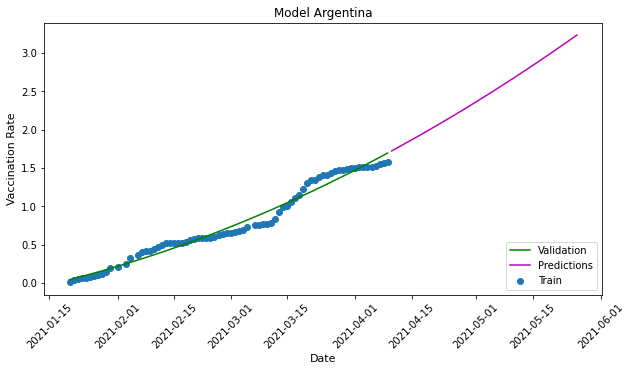

('AUT', 'Europe', 'Austria')
rmse:  0.31151409862225343
r2:  0.9678226039004197
('AUT', 'Europe', 'Austria')
rmse:  0.31151409862225343
r2:  0.9678226039004197
('AUT', 'Europe', 'Austria')
rmse:  0.31151409862225343
r2:  0.9678226039004197
('AUT', 'Europe', 'Austria')
rmse:  0.31151409862225343
r2:  0.9678226039004197
Observations in Actual Data = 84.000000, Predicted Observations=51.000000


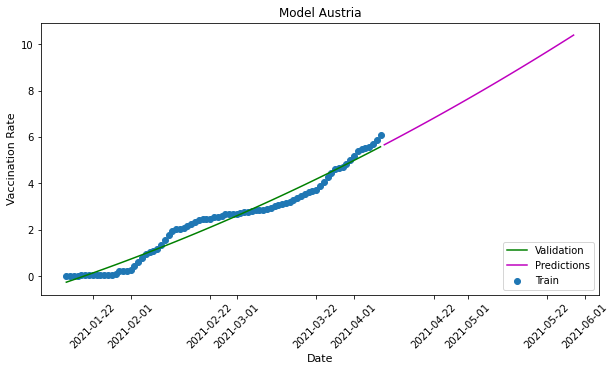

('BEL', 'Europe', 'Belgium')
rmse:  0.214260272308534
r2:  0.9830347075208905
('BEL', 'Europe', 'Belgium')
rmse:  0.214260272308534
r2:  0.9830347075208905
('BEL', 'Europe', 'Belgium')
rmse:  0.214260272308534
r2:  0.9830347075208905
('BEL', 'Europe', 'Belgium')
rmse:  0.214260272308534
r2:  0.9830347075208905
Observations in Actual Data = 81.000000, Predicted Observations=49.000000


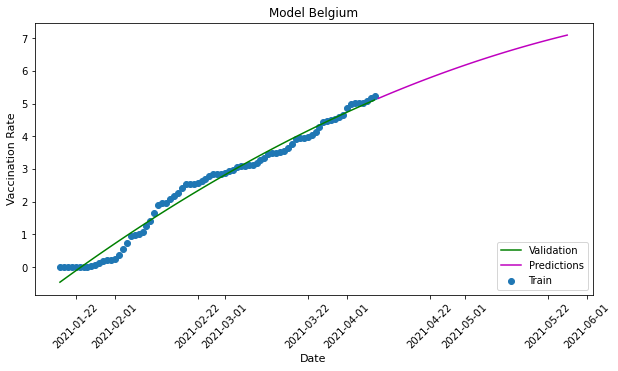

('BGR', 'Europe', 'Bulgaria')
rmse:  0.027547779632141105
r2:  0.9965688549282198
('BGR', 'Europe', 'Bulgaria')
rmse:  0.027547779632141105
r2:  0.9965688549282198
('BGR', 'Europe', 'Bulgaria')
rmse:  0.027547779632141105
r2:  0.9965688549282198
('BGR', 'Europe', 'Bulgaria')
rmse:  0.027547779632141105
r2:  0.9965688549282198
Observations in Actual Data = 82.000000, Predicted Observations=50.000000


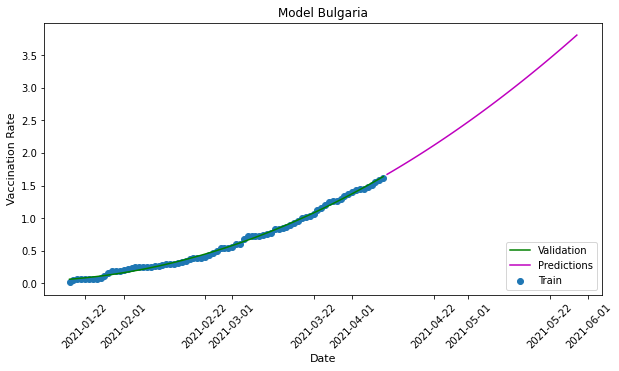

('BRA', 'South America', 'Brazil')
rmse:  0.08684098418244664
r2:  0.9880406075145932
('BRA', 'South America', 'Brazil')
rmse:  0.08684098418244664
r2:  0.9880406075145932
('BRA', 'South America', 'Brazil')
rmse:  0.08684098418244664
r2:  0.9880406075145932
('BRA', 'South America', 'Brazil')
rmse:  0.08684098418244664
r2:  0.9880406075145932
Observations in Actual Data = 57.000000, Predicted Observations=37.000000


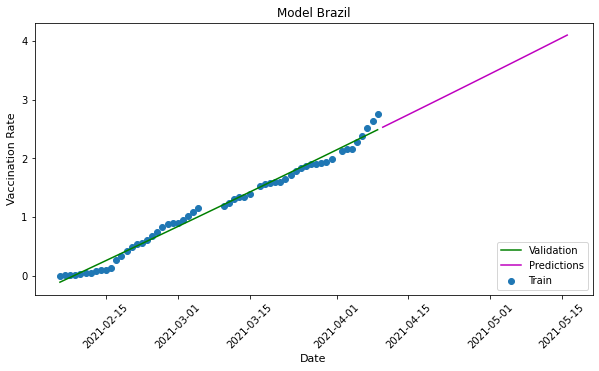

('CAN', 'North America', 'Canada')
rmse:  0.12015167957171313
r2:  0.9688756773884282
('CAN', 'North America', 'Canada')
rmse:  0.12015167957171313
r2:  0.9688756773884282
('CAN', 'North America', 'Canada')
rmse:  0.12015167957171313
r2:  0.9688756773884282
('CAN', 'North America', 'Canada')
rmse:  0.12015167957171313
r2:  0.9688756773884282
Observations in Actual Data = 93.000000, Predicted Observations=55.000000


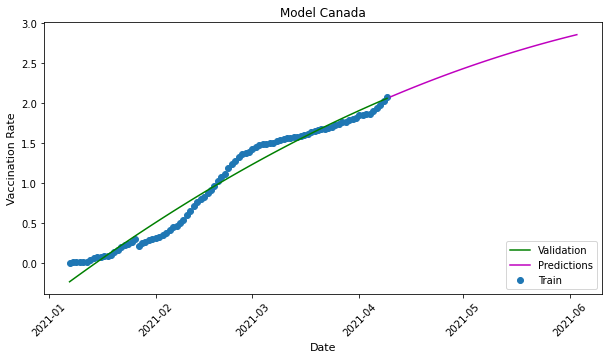

('CHE', 'Europe', 'Switzerland')
rmse:  0.07968023294058875
r2:  0.9980459349202077
('CHE', 'Europe', 'Switzerland')
rmse:  0.07968023294058875
r2:  0.9980459349202077
('CHE', 'Europe', 'Switzerland')
rmse:  0.07968023294058875
r2:  0.9980459349202077
('CHE', 'Europe', 'Switzerland')
rmse:  0.07968023294058875
r2:  0.9980459349202077
Observations in Actual Data = 53.000000, Predicted Observations=35.000000


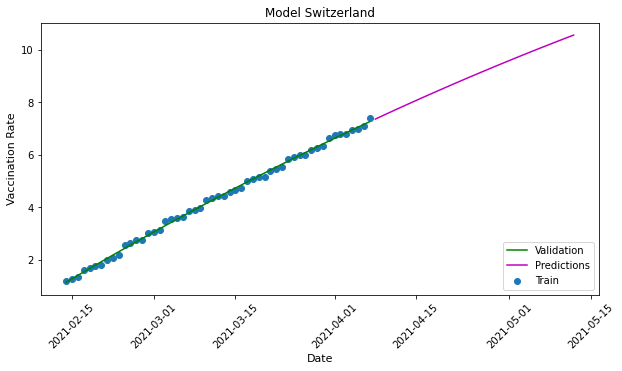

('CHL', 'South America', 'Chile')
rmse:  1.5460234294080477
r2:  0.9614745613472447
('CHL', 'South America', 'Chile')
rmse:  1.5460234294080477
r2:  0.9614745613472447
('CHL', 'South America', 'Chile')
rmse:  1.5460234294080477
r2:  0.9614745613472447
('CHL', 'South America', 'Chile')
rmse:  1.5460234294080477
r2:  0.9614745613472447
Observations in Actual Data = 86.000000, Predicted Observations=52.000000


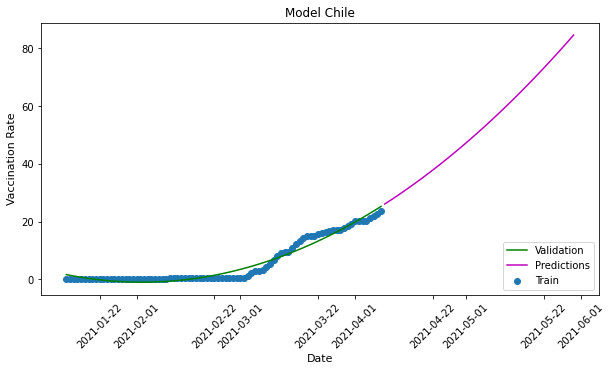

('CZE', 'Europe', 'Czechia')
rmse:  0.27018016211019674
r2:  0.9748164364866154
('CZE', 'Europe', 'Czechia')
rmse:  0.27018016211019674
r2:  0.9748164364866154
('CZE', 'Europe', 'Czechia')
rmse:  0.27018016211019674
r2:  0.9748164364866154
('CZE', 'Europe', 'Czechia')
rmse:  0.27018016211019674
r2:  0.9748164364866154
Observations in Actual Data = 84.000000, Predicted Observations=51.000000


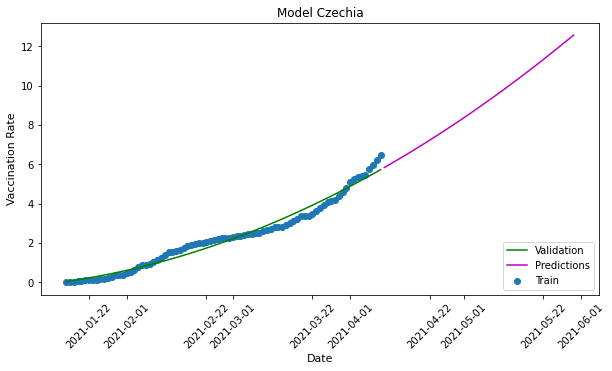

('DEU', 'Europe', 'Germany')
rmse:  0.1351006087162072
r2:  0.9944082598961276
('DEU', 'Europe', 'Germany')
rmse:  0.1351006087162072
r2:  0.9944082598961276
('DEU', 'Europe', 'Germany')
rmse:  0.1351006087162072
r2:  0.9944082598961276
('DEU', 'Europe', 'Germany')
rmse:  0.1351006087162072
r2:  0.9944082598961276
Observations in Actual Data = 103.000000, Predicted Observations=61.000000


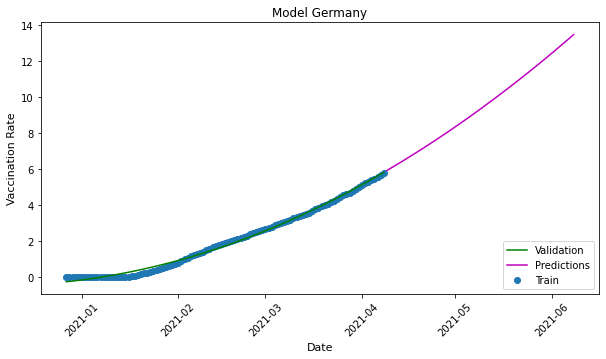

('DNK', 'Europe', 'Denmark')
rmse:  0.37447178653830393
r2:  0.9691944460587423
('DNK', 'Europe', 'Denmark')
rmse:  0.37447178653830393
r2:  0.9691944460587423
('DNK', 'Europe', 'Denmark')
rmse:  0.37447178653830393
r2:  0.9691944460587423
('DNK', 'Europe', 'Denmark')
rmse:  0.37447178653830393
r2:  0.9691944460587423
Observations in Actual Data = 84.000000, Predicted Observations=51.000000


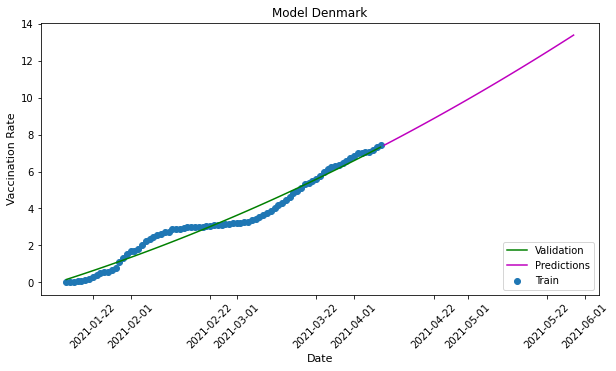

('ESP', 'Europe', 'Spain')
rmse:  0.2974085282678325
r2:  0.9765090837281698
('ESP', 'Europe', 'Spain')
rmse:  0.2974085282678325
r2:  0.9765090837281698
('ESP', 'Europe', 'Spain')
rmse:  0.2974085282678325
r2:  0.9765090837281698
('ESP', 'Europe', 'Spain')
rmse:  0.2974085282678325
r2:  0.9765090837281698
Observations in Actual Data = 59.000000, Predicted Observations=39.000000


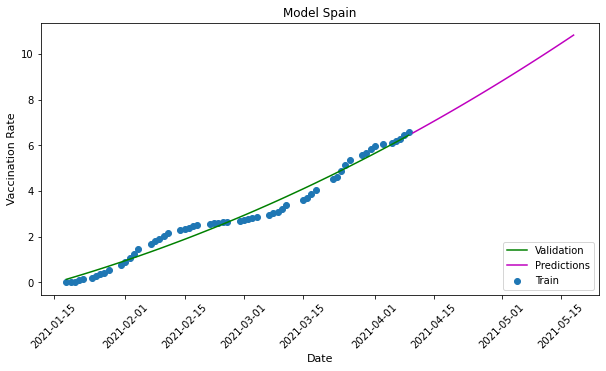

('EST', 'Europe', 'Estonia')
rmse:  0.14288787674370507
r2:  0.9911126782831954
('EST', 'Europe', 'Estonia')
rmse:  0.14288787674370507
r2:  0.9911126782831954
('EST', 'Europe', 'Estonia')
rmse:  0.14288787674370507
r2:  0.9911126782831954
('EST', 'Europe', 'Estonia')
rmse:  0.14288787674370507
r2:  0.9911126782831954
Observations in Actual Data = 62.000000, Predicted Observations=40.000000


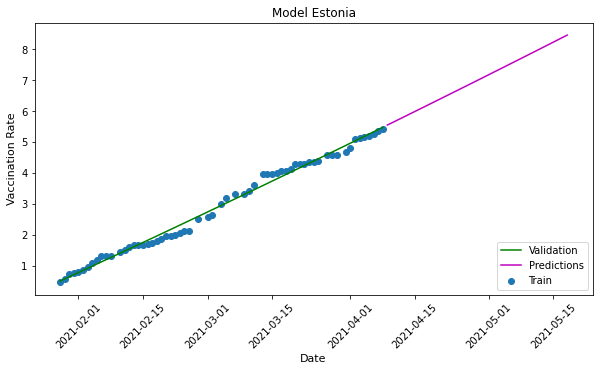

('FIN', 'Europe', 'Finland')
rmse:  0.09557835288989318
r2:  0.9566267689642792
('FIN', 'Europe', 'Finland')
rmse:  0.09557835288989318
r2:  0.9566267689642792
('FIN', 'Europe', 'Finland')
rmse:  0.09557835288989318
r2:  0.9566267689642792
('FIN', 'Europe', 'Finland')
rmse:  0.09557835288989318
r2:  0.9566267689642792
Observations in Actual Data = 69.000000, Predicted Observations=43.000000


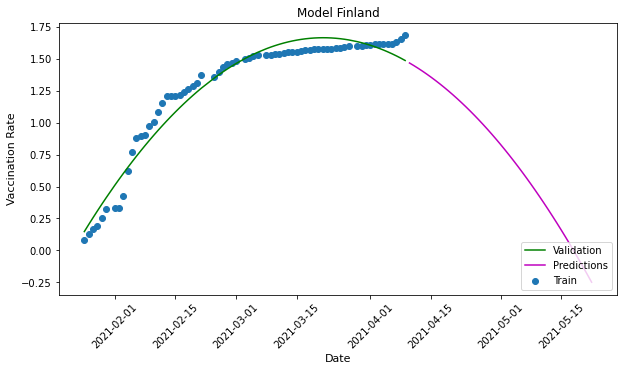

('FRA', 'Europe', 'France')
rmse:  0.15328156642859428
r2:  0.9899200967500185
('FRA', 'Europe', 'France')
rmse:  0.15328156642859428
r2:  0.9899200967500185
('FRA', 'Europe', 'France')
rmse:  0.15328156642859428
r2:  0.9899200967500185
('FRA', 'Europe', 'France')
rmse:  0.15328156642859428
r2:  0.9899200967500185
Observations in Actual Data = 69.000000, Predicted Observations=43.000000


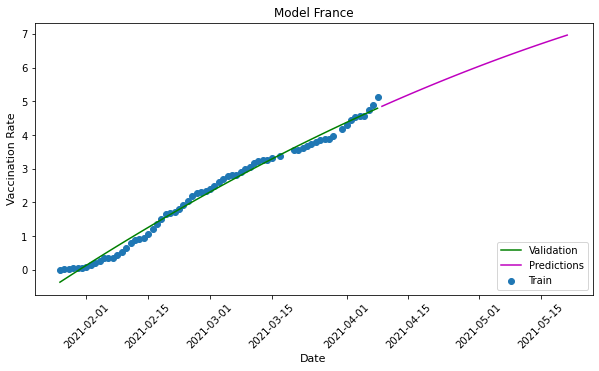

('GBR', 'Europe', 'United Kingdom')
rmse:  0.583467288355555
r2:  0.9383602146252813
('GBR', 'Europe', 'United Kingdom')
rmse:  0.583467288355555
r2:  0.9383602146252813
('GBR', 'Europe', 'United Kingdom')
rmse:  0.583467288355555
r2:  0.9383602146252813
('GBR', 'Europe', 'United Kingdom')
rmse:  0.583467288355555
r2:  0.9383602146252813
Observations in Actual Data = 90.000000, Predicted Observations=54.000000


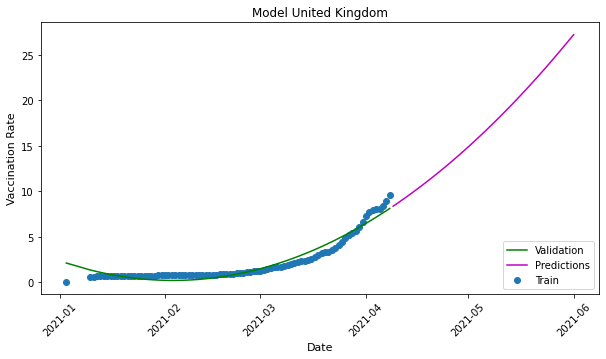

('GIB', 'Europe', 'Gibraltar')
rmse:  4.135924663892459
r2:  0.9659684849147555
('GIB', 'Europe', 'Gibraltar')
rmse:  4.135924663892459
r2:  0.9659684849147555
('GIB', 'Europe', 'Gibraltar')
rmse:  4.135924663892459
r2:  0.9659684849147555
('GIB', 'Europe', 'Gibraltar')
rmse:  4.135924663892459
r2:  0.9659684849147555
Observations in Actual Data = 61.000000, Predicted Observations=39.000000


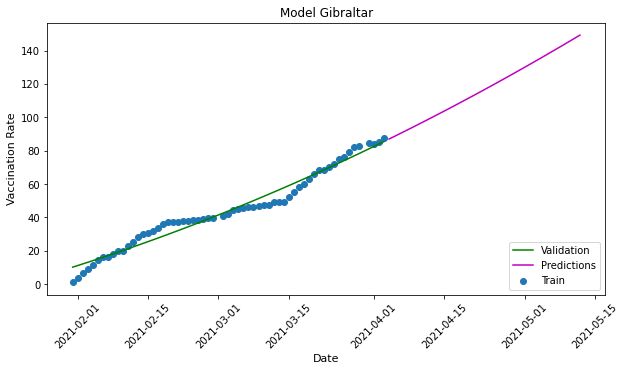

('GRC', 'Europe', 'Greece')
rmse:  0.1911649331396128
r2:  0.9917229125101952
('GRC', 'Europe', 'Greece')
rmse:  0.1911649331396128
r2:  0.9917229125101952
('GRC', 'Europe', 'Greece')
rmse:  0.1911649331396128
r2:  0.9917229125101952
('GRC', 'Europe', 'Greece')
rmse:  0.1911649331396128
r2:  0.9917229125101952
Observations in Actual Data = 73.000000, Predicted Observations=45.000000


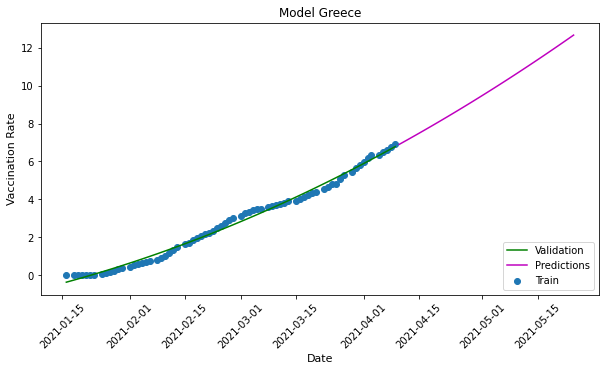

('HUN', 'Europe', 'Hungary')
rmse:  0.5151162968966504
r2:  0.9726960833468625
('HUN', 'Europe', 'Hungary')
rmse:  0.5151162968966504
r2:  0.9726960833468625
('HUN', 'Europe', 'Hungary')
rmse:  0.5151162968966504
r2:  0.9726960833468625
('HUN', 'Europe', 'Hungary')
rmse:  0.5151162968966504
r2:  0.9726960833468625
Observations in Actual Data = 81.000000, Predicted Observations=49.000000


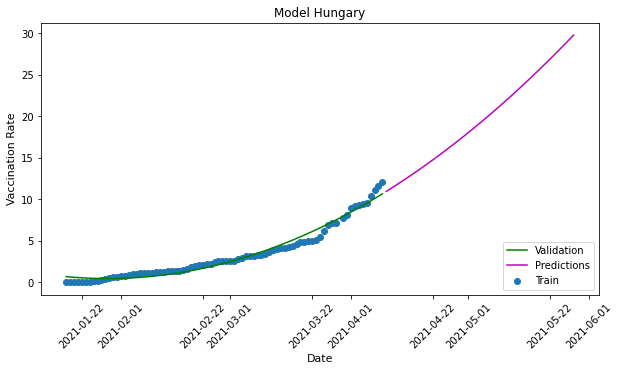

('IDN', 'Asia', 'Indonesia')
rmse:  0.06221050650410641
r2:  0.9828077036458577
('IDN', 'Asia', 'Indonesia')
rmse:  0.06221050650410641
r2:  0.9828077036458577
('IDN', 'Asia', 'Indonesia')
rmse:  0.06221050650410641
r2:  0.9828077036458577
('IDN', 'Asia', 'Indonesia')
rmse:  0.06221050650410641
r2:  0.9828077036458577
Observations in Actual Data = 57.000000, Predicted Observations=37.000000


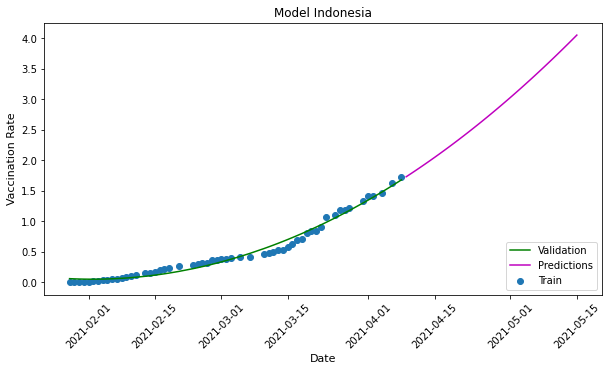

('IMN', 'Europe', 'Isle of Man')
rmse:  0.719265988953329
r2:  0.9846520037713601
('IMN', 'Europe', 'Isle of Man')
rmse:  0.719265988953329
r2:  0.9846520037713601
('IMN', 'Europe', 'Isle of Man')
rmse:  0.719265988953329
r2:  0.9846520037713601
('IMN', 'Europe', 'Isle of Man')
rmse:  0.719265988953329
r2:  0.9846520037713601
Observations in Actual Data = 60.000000, Predicted Observations=39.000000


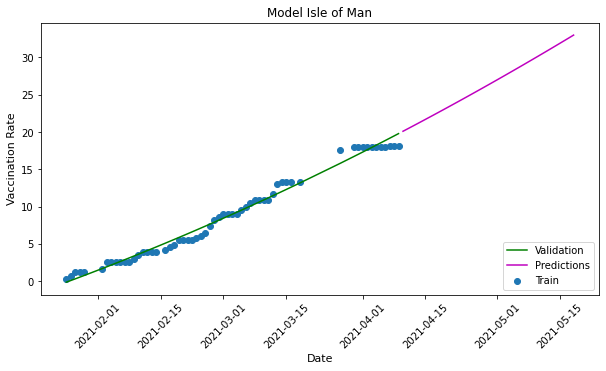

('IND', 'Asia', 'India')
rmse:  0.01661942723522816
r2:  0.996004574648258
('IND', 'Asia', 'India')
rmse:  0.01661942723522816
r2:  0.996004574648258
('IND', 'Asia', 'India')
rmse:  0.01661942723522816
r2:  0.996004574648258
('IND', 'Asia', 'India')
rmse:  0.01661942723522816
r2:  0.996004574648258
Observations in Actual Data = 55.000000, Predicted Observations=37.000000


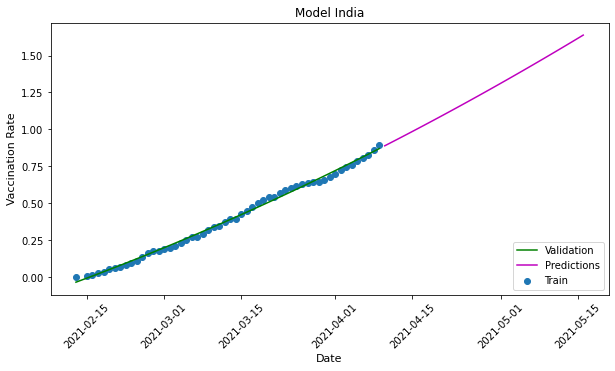

('IRL', 'Europe', 'Ireland')
rmse:  0.2527472462604112
r2:  0.9525257066982079
('IRL', 'Europe', 'Ireland')
rmse:  0.2527472462604112
r2:  0.9525257066982079
('IRL', 'Europe', 'Ireland')
rmse:  0.2527472462604112
r2:  0.9525257066982079
('IRL', 'Europe', 'Ireland')
rmse:  0.2527472462604112
r2:  0.9525257066982079
Observations in Actual Data = 60.000000, Predicted Observations=39.000000


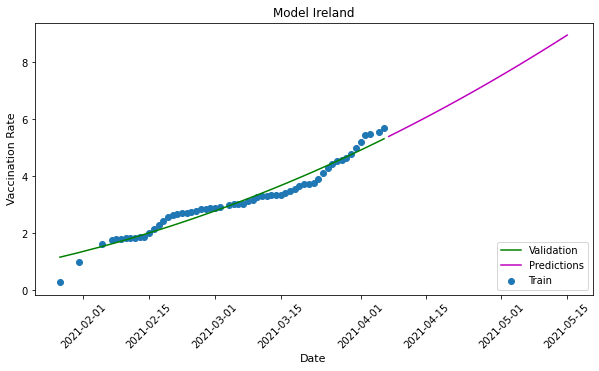

('ISR', 'Asia', 'Israel')
rmse:  1.489193742495685
r2:  0.9938214512299954
('ISR', 'Asia', 'Israel')
rmse:  1.489193742495685
r2:  0.9938214512299954
('ISR', 'Asia', 'Israel')
rmse:  1.489193742495685
r2:  0.9938214512299954
('ISR', 'Asia', 'Israel')
rmse:  1.489193742495685
r2:  0.9938214512299954
Observations in Actual Data = 96.000000, Predicted Observations=57.000000


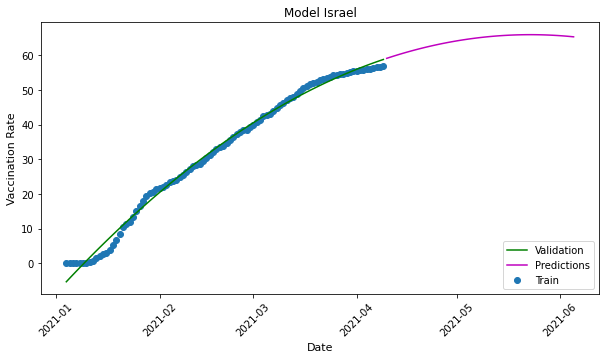

('ITA', 'Europe', 'Italy')
rmse:  0.322993333421358
r2:  0.9646145972002523
('ITA', 'Europe', 'Italy')
rmse:  0.322993333421358
r2:  0.9646145972002523
('ITA', 'Europe', 'Italy')
rmse:  0.322993333421358
r2:  0.9646145972002523
('ITA', 'Europe', 'Italy')
rmse:  0.322993333421358
r2:  0.9646145972002523
Observations in Actual Data = 83.000000, Predicted Observations=51.000000


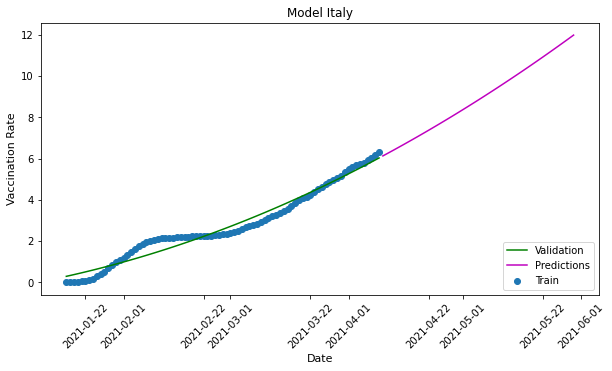

('LTU', 'Europe', 'Lithuania')
rmse:  0.24478310399890033
r2:  0.9847133571642246
('LTU', 'Europe', 'Lithuania')
rmse:  0.24478310399890033
r2:  0.9847133571642246
('LTU', 'Europe', 'Lithuania')
rmse:  0.24478310399890033
r2:  0.9847133571642246
('LTU', 'Europe', 'Lithuania')
rmse:  0.24478310399890033
r2:  0.9847133571642246
Observations in Actual Data = 80.000000, Predicted Observations=49.000000


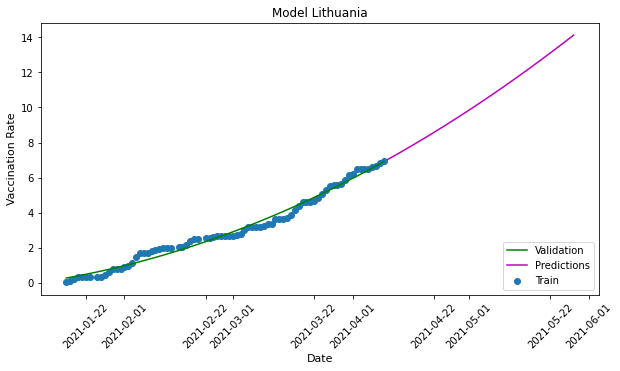

('LUX', 'Europe', 'Luxembourg')
rmse:  0.1266267790572867
r2:  0.9898622458282067
('LUX', 'Europe', 'Luxembourg')
rmse:  0.1266267790572867
r2:  0.9898622458282067
('LUX', 'Europe', 'Luxembourg')
rmse:  0.1266267790572867
r2:  0.9898622458282067
('LUX', 'Europe', 'Luxembourg')
rmse:  0.1266267790572867
r2:  0.9898622458282067
Observations in Actual Data = 52.000000, Predicted Observations=35.000000


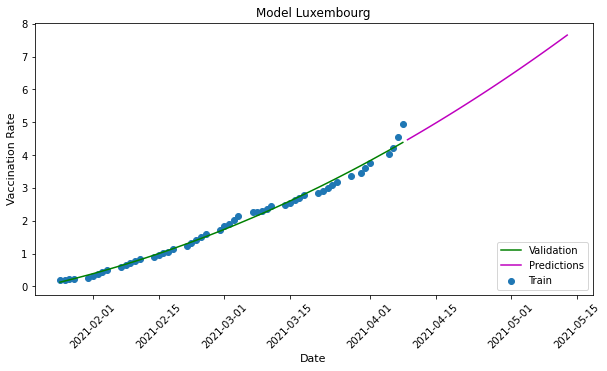

('LVA', 'Europe', 'Latvia')
rmse:  0.10813815661005333
r2:  0.899317085545212
('LVA', 'Europe', 'Latvia')
rmse:  0.10813815661005333
r2:  0.899317085545212
('LVA', 'Europe', 'Latvia')
rmse:  0.10813815661005333
r2:  0.899317085545212
('LVA', 'Europe', 'Latvia')
rmse:  0.10813815661005333
r2:  0.899317085545212
Observations in Actual Data = 72.000000, Predicted Observations=45.000000


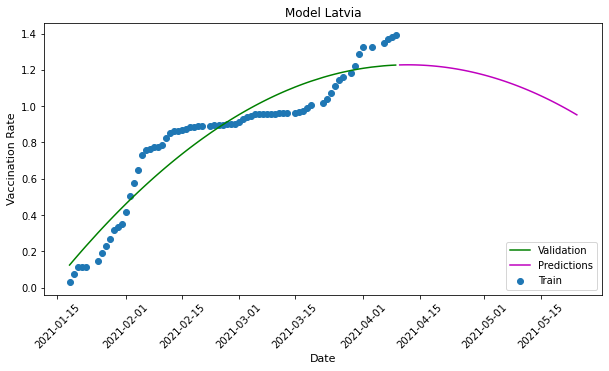

('MEX', 'North America', 'Mexico')
rmse:  0.08251443723113457
r2:  0.9300453663490598
('MEX', 'North America', 'Mexico')
rmse:  0.08251443723113457
r2:  0.9300453663490598
('MEX', 'North America', 'Mexico')
rmse:  0.08251443723113457
r2:  0.9300453663490598
('MEX', 'North America', 'Mexico')
rmse:  0.08251443723113457
r2:  0.9300453663490598
Observations in Actual Data = 73.000000, Predicted Observations=45.000000


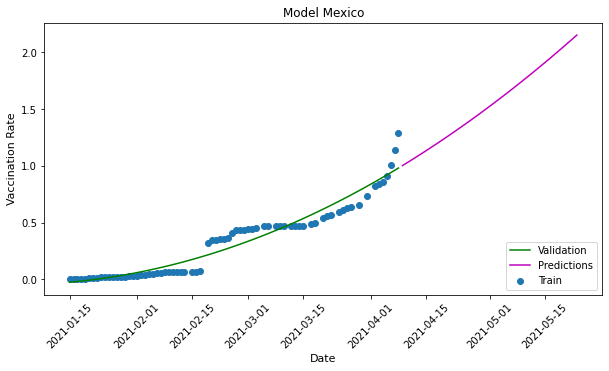

('MLT', 'Europe', 'Malta')
rmse:  0.1820156470563669
r2:  0.9981138047024984
('MLT', 'Europe', 'Malta')
rmse:  0.1820156470563669
r2:  0.9981138047024984
('MLT', 'Europe', 'Malta')
rmse:  0.1820156470563669
r2:  0.9981138047024984
('MLT', 'Europe', 'Malta')
rmse:  0.1820156470563669
r2:  0.9981138047024984
Observations in Actual Data = 75.000000, Predicted Observations=47.000000


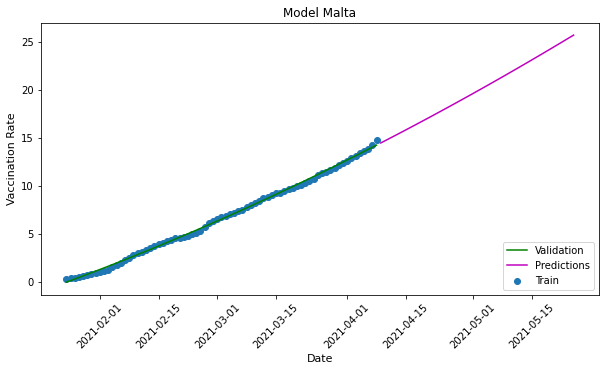

('NOR', 'Europe', 'Norway')
rmse:  0.3865723138330794
r2:  0.9618999780740807
('NOR', 'Europe', 'Norway')
rmse:  0.3865723138330794
r2:  0.9618999780740807
('NOR', 'Europe', 'Norway')
rmse:  0.3865723138330794
r2:  0.9618999780740807
('NOR', 'Europe', 'Norway')
rmse:  0.3865723138330794
r2:  0.9618999780740807
Observations in Actual Data = 82.000000, Predicted Observations=50.000000


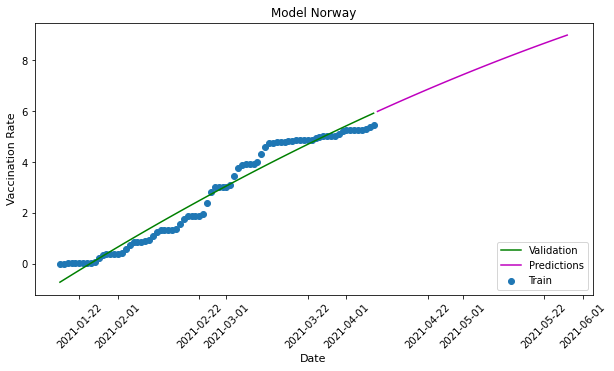

('POL', 'Europe', 'Poland')
rmse:  0.17024579596058664
r2:  0.9920041845133091
('POL', 'Europe', 'Poland')
rmse:  0.17024579596058664
r2:  0.9920041845133091
('POL', 'Europe', 'Poland')
rmse:  0.17024579596058664
r2:  0.9920041845133091
('POL', 'Europe', 'Poland')
rmse:  0.17024579596058664
r2:  0.9920041845133091
Observations in Actual Data = 68.000000, Predicted Observations=43.000000


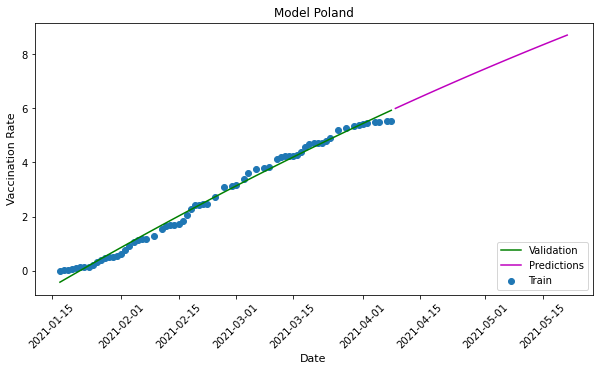

('PRT', 'Europe', 'Portugal')
rmse:  0.20009228466740372
r2:  0.9873203206346634
('PRT', 'Europe', 'Portugal')
rmse:  0.20009228466740372
r2:  0.9873203206346634
('PRT', 'Europe', 'Portugal')
rmse:  0.20009228466740372
r2:  0.9873203206346634
('PRT', 'Europe', 'Portugal')
rmse:  0.20009228466740372
r2:  0.9873203206346634
Observations in Actual Data = 83.000000, Predicted Observations=51.000000


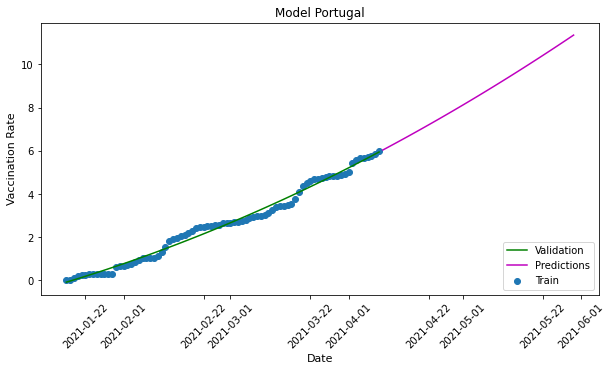

('ROU', 'Europe', 'Romania')
rmse:  0.3501387457031659
r2:  0.9660777404182767
('ROU', 'Europe', 'Romania')
rmse:  0.3501387457031659
r2:  0.9660777404182767
('ROU', 'Europe', 'Romania')
rmse:  0.3501387457031659
r2:  0.9660777404182767
('ROU', 'Europe', 'Romania')
rmse:  0.3501387457031659
r2:  0.9660777404182767
Observations in Actual Data = 82.000000, Predicted Observations=50.000000


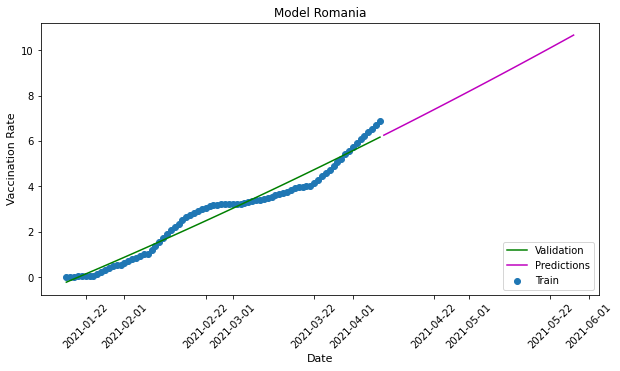

('SVK', 'Europe', 'Slovakia')
rmse:  0.28613128936021026
r2:  0.975144757478988
('SVK', 'Europe', 'Slovakia')
rmse:  0.28613128936021026
r2:  0.975144757478988
('SVK', 'Europe', 'Slovakia')
rmse:  0.28613128936021026
r2:  0.975144757478988
('SVK', 'Europe', 'Slovakia')
rmse:  0.28613128936021026
r2:  0.975144757478988
Observations in Actual Data = 82.000000, Predicted Observations=50.000000


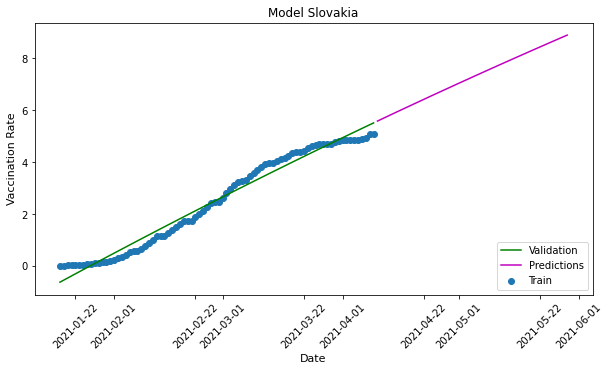

('SVN', 'Europe', 'Slovenia')
rmse:  0.32244101177787343
r2:  0.9710170547678464
('SVN', 'Europe', 'Slovenia')
rmse:  0.32244101177787343
r2:  0.9710170547678464
('SVN', 'Europe', 'Slovenia')
rmse:  0.32244101177787343
r2:  0.9710170547678464
('SVN', 'Europe', 'Slovenia')
rmse:  0.32244101177787343
r2:  0.9710170547678464
Observations in Actual Data = 92.000000, Predicted Observations=55.000000


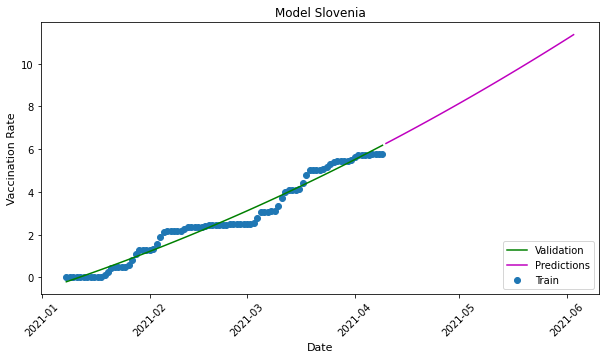

('TUR', 'Asia', 'Turkey')
rmse:  0.4021456849542743
r2:  0.9801637898658295
('TUR', 'Asia', 'Turkey')
rmse:  0.4021456849542743
r2:  0.9801637898658295
('TUR', 'Asia', 'Turkey')
rmse:  0.4021456849542743
r2:  0.9801637898658295
('TUR', 'Asia', 'Turkey')
rmse:  0.4021456849542743
r2:  0.9801637898658295
Observations in Actual Data = 56.000000, Predicted Observations=37.000000


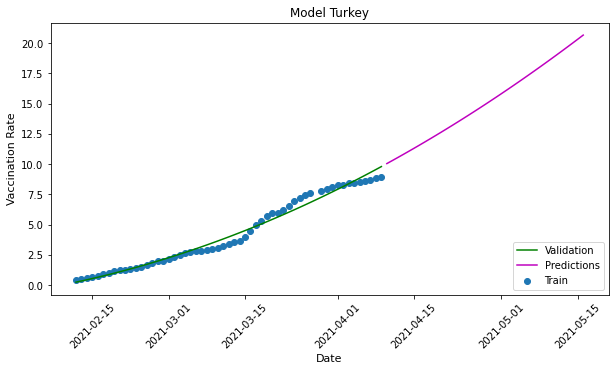

('USA', 'North America', 'United States')
rmse:  0.1788658080588295
r2:  0.9991035644787383
('USA', 'North America', 'United States')
rmse:  0.1788658080588295
r2:  0.9991035644787383
('USA', 'North America', 'United States')
rmse:  0.1788658080588295
r2:  0.9991035644787383
('USA', 'North America', 'United States')
rmse:  0.1788658080588295
r2:  0.9991035644787383
Observations in Actual Data = 82.000000, Predicted Observations=50.000000


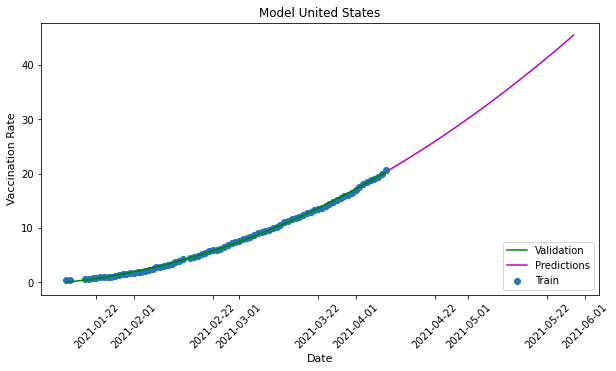

In [235]:
dct_original = {} # create dictionaries to save outputs later
dct_future = {}
for name, group in df_grouped:
    group1 = group[group['people_fully_vaccinated'].notna()] # select only data with values
    if len(group1) > 50: # filter by groups with at least 50 vaccination rates observations
        predict_dates = poly(name, group1)[2] # save outputs of poly function to use it for predictions
        model = poly(name, group1)[0]
        polynomial_features = poly(name, group1)[1]
        group_export = poly(name, group1)[3]
        group_export['Location'] = name[2]
        Predictions = model.predict(polynomial_features.fit_transform(np.array(predict_dates).reshape(-1,1))) # predict transformed future values
        Predictions_df = pd.DataFrame({'Future_dates': list(predict_dates),'Predictions': list(Predictions)}) # save predictions into dataframe
        Predictions_df = Predictions_df.set_index(Predictions_df['Future_dates'].map(dt.datetime.fromordinal)) # tranform back the tranformed int dates to normal dates
        Predictions_df['Location'] = name[2] 
        dct_original[name] = group_export # train df and validation dataframe saved in dictionary
        dct_future[name] = Predictions_df # predictions dataframe saved in dictionary
        plt.figure(figsize=(10,5)) # plot, input data, validation and future predictions
        plt.xticks(rotation=45)
        plt.title('Model ' + name[2])
        plt.xlabel('Date', fontsize=11)
        plt.ylabel('Vaccination Rate', fontsize=11)
        plt.scatter(group_export.index, group_export['vaccination_rate'])
        plt.plot(group_export['Pred'], color = 'g')
        plt.plot(Predictions_df[['Predictions']], color = 'm')
        plt.legend(['Validation', 'Predictions', 'Train'], loc='lower right')
        plt.show()
        print('Observations in Actual Data = %f, Predicted Observations=%f' % (len(group1), len(Predictions)))
        print( "\n".join("{} {}".format(x, y) for x, y in zip(predict_dates, Predictions)))


In [242]:
dct_future

{('ARG',
  'South America',
  'Argentina'):               Future_dates  Predictions   Location
 Future_dates                                      
 2021-04-10          737890     1.723059  Argentina
 2021-04-11          737891     1.751676  Argentina
 2021-04-12          737892     1.780481  Argentina
 2021-04-13          737893     1.809473  Argentina
 2021-04-14          737894     1.838654  Argentina
 2021-04-15          737895     1.868023  Argentina
 2021-04-16          737896     1.897579  Argentina
 2021-04-17          737897     1.927324  Argentina
 2021-04-18          737898     1.957257  Argentina
 2021-04-19          737899     1.987377  Argentina
 2021-04-20          737900     2.017686  Argentina
 2021-04-21          737901     2.048183  Argentina
 2021-04-22          737902     2.078867  Argentina
 2021-04-23          737903     2.109740  Argentina
 2021-04-24          737904     2.140801  Argentina
 2021-04-25          737905     2.172049  Argentina
 2021-04-26          

In [243]:
Predictions_covid = pd.concat(dct_future.values())

In [244]:
Predictions_covid

,Future_dates,Predictions,Location
Future_dates,,,
2021-04-10,737890,1.723059,Argentina
2021-04-11,737891,1.751676,Argentina
2021-04-12,737892,1.780481,Argentina
2021-04-13,737893,1.809473,Argentina
2021-04-14,737894,1.838654,Argentina
...,...,...,...
2021-05-25,737935,43.124059,United States
2021-05-26,737936,43.712626,United States
2021-05-27,737937,44.305127,United States


In [245]:
pd.concat(dct_future.values()).to_excel(r'C:\Users\Deepika\OneDrive\Documents\Professional\Predictions_covid.xlsx')
# export future predictions

## Attempting to predict with ARIMA and other rough analyses

In [14]:
# Evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    X = ts.values
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        # model_fit = model.fit(disp=0)
        model_fit = model.fit(trend='nc', disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(ts, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    rmse = evaluate_arima_model(ts, order)
#                     print(rmse)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
#                     print('ARIMA%s RMSE=%.3f' % (order, rmse))
                except:
                    continue
#     print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
#     print('Best_cfg: ', best_cfg)   
    return best_cfg
    
def StartProducingARIMAForecastValues(ts, Order):
    model = ARIMA(ts, order = Order)
    model_fit = model.fit(disp=0)
    pred = model_fit.forecast()[0]
    return pred, model_fit

In [59]:
df.loc[df['location'] == 'Argentina']['people_fully_vaccinated'].notna().sum()

73

In [15]:
for name, group in df_grouped:
    group['vaccination_rate'] = (group['people_fully_vaccinated']/group['population']) * 100
    group1 = group[group['people_fully_vaccinated'].notna()]
        
    if name[2] == 'Germany':
        ts = group1[['date','vaccination_rate']]
        ts['date'] = pd.to_datetime(ts['date'])
        start_date = ts['date'].max()         
        ts.set_index('date', inplace = True)
        p_values = range(0, 5)
        d_values = range(0, 1)
        q_values = range(0, 2)

        Order = evaluate_models(ts, p_values, d_values, q_values)

        Actual = [x for x in ts.values]
        Predictions = list()
        y = list()
        for timestamp in range(len(ts.values)):
            ActualValue = ts.values[timestamp]
            try:
                Prediction = StartProducingARIMAForecastValues(Actual, Order)[0]
                model = StartProducingARIMAForecastValues(Actual, Order)[1]
                Predictions.append(Prediction)
                Actual.append(ActualValue)
                y.append(ActualValue)
                pred_outsample = model.forecast(steps = 10)[0]
                Range = pd.date_range(start = start_date, periods = len(pred_outsample), freq='D')
                ts_pred = pd.DataFrame(data={'Pred': pred_outsample}, index = Range)
                print(name, ts_pred)
                ax = ts.plot(label='observed' + name[2], figsize=(20, 15))
                ts_pred.plot(ax=ax, label='Forecast')
                ax.set_xlabel('Date')
                ax.set_ylabel('Vaccination Rate')
                plt.legend()
                plt.show()
            except:
                continue

('AUT', 'Europe', 'Austria')                 Pred
2021-04-05  5.547471
2021-04-06  5.606111
2021-04-07  5.665180
2021-04-08  5.724523
2021-04-09  5.784111
2021-04-10  5.843936
2021-04-11  5.903995
2021-04-12  5.964284
2021-04-13  6.024800
2021-04-14  6.085540
('AUT', 'Europe', 'Austria')                  Pred
2021-04-05  -0.055217
2021-04-06  -5.397116
2021-04-07  -5.056532
2021-04-08  -9.773060
2021-04-09  -8.606331
2021-04-10 -12.333786
2021-04-11 -10.060509
2021-04-12 -12.614652
2021-04-13  -9.155207
2021-04-14 -10.564694
('AUT', 'Europe', 'Austria')                  Pred
2021-04-05  -5.343907
2021-04-06  -4.952844
2021-04-07  -9.678921
2021-04-08  -8.471227
2021-04-09 -12.219421
2021-04-10  -9.917417
2021-04-11 -12.505018
2021-04-12  -9.029339
2021-04-13 -10.483960
2021-04-14  -5.967930
('AUT', 'Europe', 'Austria')                 Pred
2021-04-05  0.122386
2021-04-06  0.237822
2021-04-07  0.350634
2021-04-08  0.455468
2021-04-09  0.552641
2021-04-10  0.642437
2021-04-11  0.725391
2

('AUT', 'Europe', 'Austria')                 Pred
2021-04-05  2.036123
2021-04-06  2.015099
2021-04-07  1.992641
2021-04-08  1.971459
2021-04-09  1.951556
2021-04-10  1.932985
2021-04-11  1.915668
2021-04-12  1.899527
2021-04-13  1.884484
2021-04-14  1.870464
('AUT', 'Europe', 'Austria')                 Pred
2021-04-05  2.117407
2021-04-06  2.094432
2021-04-07  2.067758
2021-04-08  2.042468
2021-04-09  2.018600
2021-04-10  1.996315
2021-04-11  1.975526
2021-04-12  1.956145
2021-04-13  1.938079
2021-04-14  1.921240
('AUT', 'Europe', 'Austria')                 Pred
2021-04-05  2.221149
2021-04-06  2.193870
2021-04-07  2.161800
2021-04-08  2.131274
2021-04-09  2.102438
2021-04-10  2.075502
2021-04-11  2.050369
2021-04-12  2.026936
2021-04-13  2.005089
2021-04-14  1.984723
('AUT', 'Europe', 'Austria')                 Pred
2021-04-05  2.305081
2021-04-06  2.272538
2021-04-07  2.236092
2021-04-08  2.201432
2021-04-09  2.168761
2021-04-10  2.138244
2021-04-11  2.109770
2021-04-12  2.083218
20

('AUT', 'Europe', 'Austria')                 Pred
2021-04-05  3.446108
2021-04-06  3.371981
2021-04-07  3.293646
2021-04-08  3.218980
2021-04-09  3.148154
2021-04-10  3.081361
2021-04-11  3.018410
2021-04-12  2.959102
2021-04-13  2.903229
2021-04-14  2.850593
('AUT', 'Europe', 'Austria')                 Pred
2021-04-05  3.547726
2021-04-06  3.470927
2021-04-07  3.389236
2021-04-08  3.311282
2021-04-09  3.237250
2021-04-10  3.167370
2021-04-11  3.101450
2021-04-12  3.039290
2021-04-13  2.980679
2021-04-14  2.925415
('AUT', 'Europe', 'Austria')                 Pred
2021-04-05  3.586797
2021-04-06  3.506272
2021-04-07  3.423838
2021-04-08  3.345242
2021-04-09  3.270711
2021-04-10  3.200331
2021-04-11  3.133906
2021-04-12  3.071232
2021-04-13  3.012100
2021-04-14  2.956311
('AUT', 'Europe', 'Austria')                 Pred
2021-04-05  3.609942
2021-04-06  3.528654
2021-04-07  3.446150
2021-04-08  3.367627
2021-04-09  3.293168
2021-04-10  3.222825
2021-04-11  3.156399
2021-04-12  3.093688
20

('BEL', 'Europe', 'Belgium')                 Pred
2021-04-05  0.315365
2021-04-06  0.379486
2021-04-07  0.441597
2021-04-08  0.500528
2021-04-09  0.556344
2021-04-10  0.609159
2021-04-11  0.659127
2021-04-12  0.706401
2021-04-13  0.751125
2021-04-14  0.793436
('BEL', 'Europe', 'Belgium')                 Pred
2021-04-05  0.433076
2021-04-06  0.495304
2021-04-07  0.552371
2021-04-08  0.606312
2021-04-09  0.657257
2021-04-10  0.705435
2021-04-11  0.750999
2021-04-12  0.794092
2021-04-13  0.834848
2021-04-14  0.873394
('BEL', 'Europe', 'Belgium')                 Pred
2021-04-05  0.607719
2021-04-06  0.665120
2021-04-07  0.715170
2021-04-08  0.762186
2021-04-09  0.806441
2021-04-10  0.848246
2021-04-11  0.887748
2021-04-12  0.925080
2021-04-13  0.960361
2021-04-14  0.993705
('BEL', 'Europe', 'Belgium')                 Pred
2021-04-05  0.807938
2021-04-06  0.858394
2021-04-07  0.900279
2021-04-08  0.939346
2021-04-09  0.975973
2021-04-10  1.010524
2021-04-11  1.043133
2021-04-12  1.073921
20

('BEL', 'Europe', 'Belgium')                 Pred
2021-04-05  3.048948
2021-04-06  2.995900
2021-04-07  2.940374
2021-04-08  2.887211
2021-04-09  2.836638
2021-04-10  2.788771
2021-04-11  2.743497
2021-04-12  2.700689
2021-04-13  2.660216
2021-04-14  2.621950
('BEL', 'Europe', 'Belgium')                 Pred
2021-04-05  3.051732
2021-04-06  2.996725
2021-04-07  2.941443
2021-04-08  2.888678
2021-04-09  2.838584
2021-04-10  2.791176
2021-04-11  2.746330
2021-04-12  2.703917
2021-04-13  2.663808
2021-04-14  2.625877
('BEL', 'Europe', 'Belgium')                 Pred
2021-04-05  3.051291
2021-04-06  2.996539
2021-04-07  2.941723
2021-04-08  2.889507
2021-04-09  2.839940
2021-04-10  2.793023
2021-04-11  2.748633
2021-04-12  2.706640
2021-04-13  2.666917
2021-04-14  2.629341
('BEL', 'Europe', 'Belgium')                 Pred
2021-04-05  3.068751
2021-04-06  3.014639
2021-04-07  2.959721
2021-04-08  2.907358
2021-04-09  2.857597
2021-04-10  2.810477
2021-04-11  2.765876
2021-04-12  2.723669
20

('BGR', 'Europe', 'Bulgaria')                 Pred
2021-04-06 -0.260589
2021-04-07 -0.265929
2021-04-08 -0.214875
2021-04-09 -0.155908
2021-04-10 -0.099612
2021-04-11 -0.047978
2021-04-12 -0.001077
2021-04-13  0.041423
2021-04-14  0.079911
2021-04-15  0.114761
('BGR', 'Europe', 'Bulgaria')                 Pred
2021-04-06  0.073257
2021-04-07  0.099058
2021-04-08  0.123122
2021-04-09  0.145565
2021-04-10  0.166496
2021-04-11  0.186017
2021-04-12  0.204224
2021-04-13  0.221204
2021-04-14  0.237041
2021-04-15  0.251811
('BGR', 'Europe', 'Bulgaria')                 Pred
2021-04-06  0.087927
2021-04-07  0.112397
2021-04-08  0.135232
2021-04-09  0.156539
2021-04-10  0.176423
2021-04-11  0.194977
2021-04-12  0.212290
2021-04-13  0.228446
2021-04-14  0.243522
2021-04-15  0.257590
('BGR', 'Europe', 'Bulgaria')                 Pred
2021-04-06  0.090479
2021-04-07  0.114201
2021-04-08  0.136356
2021-04-09  0.157047
2021-04-10  0.176371
2021-04-11  0.194419
2021-04-12  0.211274
2021-04-13  0.22701

('BGR', 'Europe', 'Bulgaria')                 Pred
2021-04-06  0.387899
2021-04-07  0.390563
2021-04-08  0.393064
2021-04-09  0.395411
2021-04-10  0.397614
2021-04-11  0.399682
2021-04-12  0.401624
2021-04-13  0.403446
2021-04-14  0.405157
2021-04-15  0.406763
('BGR', 'Europe', 'Bulgaria')                 Pred
2021-04-06  0.390147
2021-04-07  0.392664
2021-04-08  0.395026
2021-04-09  0.397244
2021-04-10  0.399326
2021-04-11  0.401281
2021-04-12  0.403116
2021-04-13  0.404839
2021-04-14  0.406456
2021-04-15  0.407974
('BGR', 'Europe', 'Bulgaria')                 Pred
2021-04-06  0.390794
2021-04-07  0.393250
2021-04-08  0.395557
2021-04-09  0.397723
2021-04-10  0.399756
2021-04-11  0.401665
2021-04-12  0.403457
2021-04-13  0.405140
2021-04-14  0.406719
2021-04-15  0.408202
('BGR', 'Europe', 'Bulgaria')                 Pred
2021-04-06  0.404171
2021-04-07  0.405889
2021-04-08  0.407502
2021-04-09  0.409016
2021-04-10  0.410437
2021-04-11  0.411772
2021-04-12  0.413025
2021-04-13  0.41420

('BGR', 'Europe', 'Bulgaria')                 Pred
2021-04-06  1.101707
2021-04-07  1.075545
2021-04-08  1.050617
2021-04-09  1.026873
2021-04-10  1.004258
2021-04-11  0.982719
2021-04-12  0.962203
2021-04-13  0.942663
2021-04-14  0.924051
2021-04-15  0.906325
('BGR', 'Europe', 'Bulgaria')                 Pred
2021-04-06  1.123978
2021-04-07  1.097641
2021-04-08  1.072522
2021-04-09  1.048569
2021-04-10  1.025730
2021-04-11  1.003951
2021-04-12  0.983185
2021-04-13  0.963383
2021-04-14  0.944501
2021-04-15  0.926497
('BGR', 'Europe', 'Bulgaria')                 Pred
2021-04-06  1.169025
2021-04-07  1.142046
2021-04-08  1.116264
2021-04-09  1.091635
2021-04-10  1.068109
2021-04-11  1.045635
2021-04-12  1.024166
2021-04-13  1.003658
2021-04-14  0.984068
2021-04-15  0.965354
('BGR', 'Europe', 'Bulgaria')                 Pred
2021-04-06  1.225654
2021-04-07  1.197917
2021-04-08  1.171354
2021-04-09  1.145927
2021-04-10  1.121586
2021-04-11  1.098286
2021-04-12  1.075982
2021-04-13  1.05463

('CAN', 'North America', 'Canada')                 Pred
2021-04-06  0.247460
2021-04-07  0.261434
2021-04-08  0.274880
2021-04-09  0.287800
2021-04-10  0.300217
2021-04-11  0.312149
2021-04-12  0.323615
2021-04-13  0.334634
2021-04-14  0.345224
2021-04-15  0.355400
('CAN', 'North America', 'Canada')                 Pred
2021-04-06  0.279407
2021-04-07  0.292536
2021-04-08  0.304950
2021-04-09  0.316874
2021-04-10  0.328329
2021-04-11  0.339335
2021-04-12  0.349911
2021-04-13  0.360073
2021-04-14  0.369837
2021-04-15  0.379219
('CAN', 'North America', 'Canada')                 Pred
2021-04-06  0.316039
2021-04-07  0.328041
2021-04-08  0.339298
2021-04-09  0.350105
2021-04-10  0.360484
2021-04-11  0.370455
2021-04-12  0.380034
2021-04-13  0.389236
2021-04-14  0.398077
2021-04-15  0.406570
('CAN', 'North America', 'Canada')                 Pred
2021-04-06  0.231160
2021-04-07  0.244093
2021-04-08  0.257492
2021-04-09  0.270391
2021-04-10  0.282805
2021-04-11  0.294743
2021-04-12  0.306224

('CAN', 'North America', 'Canada')                 Pred
2021-04-06  1.260075
2021-04-07  1.241968
2021-04-08  1.223315
2021-04-09  1.205300
2021-04-10  1.187938
2021-04-11  1.171230
2021-04-12  1.155154
2021-04-13  1.139686
2021-04-14  1.124803
2021-04-15  1.110484
('CAN', 'North America', 'Canada')                 Pred
2021-04-06  1.303574
2021-04-07  1.284603
2021-04-08  1.264916
2021-04-09  1.245893
2021-04-10  1.227547
2021-04-11  1.209884
2021-04-12  1.192880
2021-04-13  1.176513
2021-04-14  1.160757
2021-04-15  1.145591
('CAN', 'North America', 'Canada')                 Pred
2021-04-06  1.337540
2021-04-07  1.317649
2021-04-08  1.297243
2021-04-09  1.277521
2021-04-10  1.258496
2021-04-11  1.240172
2021-04-12  1.222524
2021-04-13  1.205528
2021-04-14  1.189160
2021-04-15  1.173398
('CAN', 'North America', 'Canada')                 Pred
2021-04-06  1.357350
2021-04-07  1.336839
2021-04-08  1.316116
2021-04-09  1.296093
2021-04-10  1.276778
2021-04-11  1.258168
2021-04-12  1.240239

('CAN', 'North America', 'Canada')                 Pred
2021-04-06  1.735618
2021-04-07  1.715031
2021-04-08  1.694251
2021-04-09  1.673972
2021-04-10  1.654204
2021-04-11  1.634947
2021-04-12  1.616190
2021-04-13  1.597919
2021-04-14  1.580123
2021-04-15  1.562788
('CAN', 'North America', 'Canada')                 Pred
2021-04-06  1.746043
2021-04-07  1.725505
2021-04-08  1.704844
2021-04-09  1.684679
2021-04-10  1.665016
2021-04-11  1.645856
2021-04-12  1.627187
2021-04-13  1.608996
2021-04-14  1.591270
2021-04-15  1.573999
('CAN', 'North America', 'Canada')                 Pred
2021-04-06  1.760935
2021-04-07  1.740559
2021-04-08  1.719970
2021-04-09  1.699868
2021-04-10  1.680257
2021-04-11  1.661140
2021-04-12  1.642505
2021-04-13  1.624340
2021-04-14  1.606633
2021-04-15  1.589374
('CAN', 'North America', 'Canada')                 Pred
2021-04-06  1.780377
2021-04-07  1.760117
2021-04-08  1.739553
2021-04-09  1.719462
2021-04-10  1.699852
2021-04-11  1.680728
2021-04-12  1.662077

('CHL', 'South America', 'Chile')                 Pred
2021-04-06  0.232523
2021-04-07  0.405128
2021-04-08  0.568324
2021-04-09  0.722463
2021-04-10  0.868042
2021-04-11  1.005537
2021-04-12  1.135396
2021-04-13  1.258044
2021-04-14  1.373881
2021-04-15  1.483285
('CHL', 'South America', 'Chile')                 Pred
2021-04-06  0.230446
2021-04-07  0.401061
2021-04-08  0.562394
2021-04-09  0.714807
2021-04-10  0.858788
2021-04-11  0.994803
2021-04-12  1.123293
2021-04-13  1.244674
2021-04-14  1.359341
2021-04-15  1.467663
('CHL', 'South America', 'Chile')                 Pred
2021-04-06  0.239221
2021-04-07  0.407417
2021-04-08  0.566473
2021-04-09  0.716765
2021-04-10  0.858772
2021-04-11  0.992950
2021-04-12  1.119731
2021-04-13  1.239523
2021-04-14  1.352710
2021-04-15  1.459658
('CHL', 'South America', 'Chile')                 Pred
2021-04-06  0.240428
2021-04-07  0.406588
2021-04-08  0.563744
2021-04-09  0.712271
2021-04-10  0.852639
2021-04-11  0.985296
2021-04-12  1.110666
202

('CHL', 'South America', 'Chile')                 Pred
2021-04-06  2.909992
2021-04-07  2.920109
2021-04-08  2.928434
2021-04-09  2.936267
2021-04-10  2.943685
2021-04-11  2.950713
2021-04-12  2.957370
2021-04-13  2.963677
2021-04-14  2.969651
2021-04-15  2.975311
('CHL', 'South America', 'Chile')                 Pred
2021-04-06  3.012106
2021-04-07  3.016323
2021-04-08  3.020093
2021-04-09  3.023654
2021-04-10  3.027028
2021-04-11  3.030223
2021-04-12  3.033250
2021-04-13  3.036118
2021-04-14  3.038835
2021-04-15  3.041408
('CHL', 'South America', 'Chile')                 Pred
2021-04-06  3.043189
2021-04-07  3.045746
2021-04-08  3.048109
2021-04-09  3.050345
2021-04-10  3.052463
2021-04-11  3.054469
2021-04-12  3.056370
2021-04-13  3.058171
2021-04-14  3.059877
2021-04-15  3.061493
('CHL', 'South America', 'Chile')                 Pred
2021-04-06  4.138350
2021-04-07  4.092220
2021-04-08  4.046098
2021-04-09  4.002299
2021-04-10  3.960804
2021-04-11  3.921497
2021-04-12  3.884263
202

('CHL', 'South America', 'Chile')                  Pred
2021-04-06  20.913231
2021-04-07  20.585978
2021-04-08  20.247395
2021-04-09  19.915857
2021-04-10  19.592344
2021-04-11  19.276946
2021-04-12  18.969485
2021-04-13  18.669769
2021-04-14  18.377601
2021-04-15  18.092792
('CZE', 'Europe', 'Czechia')                 Pred
2021-04-06  5.961552
2021-04-07  6.204098
2021-04-08  6.442383
2021-04-09  6.676490
2021-04-10  6.906500
2021-04-11  7.132493
2021-04-12  7.354545
2021-04-13  7.572735
2021-04-14  7.787137
2021-04-15  7.997823
('CZE', 'Europe', 'Czechia')                 Pred
2021-04-06  1.520552
2021-04-07  1.115973
2021-04-08  1.223622
2021-04-09  1.194980
2021-04-10  1.202601
2021-04-11  1.200573
2021-04-12  1.201112
2021-04-13  1.200969
2021-04-14  1.201007
2021-04-15  1.200997
('CZE', 'Europe', 'Czechia')                 Pred
2021-04-06  0.131434
2021-04-07  0.248779
2021-04-08  0.357070
2021-04-09  0.456988
2021-04-10  0.549180
2021-04-11  0.634243
2021-04-12  0.712728
2021-04

2021-04-15  1.607712
('CZE', 'Europe', 'Czechia')                 Pred
2021-04-06  1.727664
2021-04-07  1.716887
2021-04-08  1.706840
2021-04-09  1.697481
2021-04-10  1.688764
2021-04-11  1.680645
2021-04-12  1.673083
2021-04-13  1.666039
2021-04-14  1.659478
2021-04-15  1.653367
('CZE', 'Europe', 'Czechia')                 Pred
2021-04-06  1.799708
2021-04-07  1.784618
2021-04-08  1.770553
2021-04-09  1.757452
2021-04-10  1.745249
2021-04-11  1.733882
2021-04-12  1.723294
2021-04-13  1.713432
2021-04-14  1.704245
2021-04-15  1.695689
('CZE', 'Europe', 'Czechia')                 Pred
2021-04-06  1.869555
2021-04-07  1.850324
2021-04-08  1.832399
2021-04-09  1.815702
2021-04-10  1.800148
2021-04-11  1.785659
2021-04-12  1.772162
2021-04-13  1.759589
2021-04-14  1.747878
2021-04-15  1.736968
('CZE', 'Europe', 'Czechia')                 Pred
2021-04-06  1.932852
2021-04-07  1.909917
2021-04-08  1.888540
2021-04-09  1.868625
2021-04-10  1.850073
2021-04-11  1.832789
2021-04-12  1.816687
20

('CZE', 'Europe', 'Czechia')                 Pred
2021-04-06  3.269502
2021-04-07  3.186200
2021-04-08  3.107817
2021-04-09  3.034077
2021-04-10  2.964705
2021-04-11  2.899442
2021-04-12  2.838045
2021-04-13  2.780285
2021-04-14  2.725946
2021-04-15  2.674826
('CZE', 'Europe', 'Czechia')                 Pred
2021-04-06  3.284146
2021-04-07  3.201309
2021-04-08  3.123319
2021-04-09  3.049906
2021-04-10  2.980801
2021-04-11  2.915751
2021-04-12  2.854519
2021-04-13  2.796881
2021-04-14  2.742624
2021-04-15  2.691552
('CZE', 'Europe', 'Czechia')                 Pred
2021-04-06  3.396291
2021-04-07  3.309565
2021-04-08  3.227813
2021-04-09  3.150773
2021-04-10  3.078173
2021-04-11  3.009758
2021-04-12  2.945287
2021-04-13  2.884532
2021-04-14  2.827279
2021-04-15  2.773326
('CZE', 'Europe', 'Czechia')                 Pred
2021-04-06  3.515689
2021-04-07  3.424986
2021-04-08  3.339385
2021-04-09  3.258626
2021-04-10  3.182434
2021-04-11  3.110552
2021-04-12  3.042736
2021-04-13  2.978755
20

('DEU', 'Europe', 'Germany')                 Pred
2021-04-05  0.057604
2021-04-06  0.111969
2021-04-07  0.163864
2021-04-08  0.213383
2021-04-09  0.260634
2021-04-10  0.305722
2021-04-11  0.348745
2021-04-12  0.389798
2021-04-13  0.428971
2021-04-14  0.466350
('DEU', 'Europe', 'Germany')                 Pred
2021-04-05  0.056862
2021-04-06  0.110457
2021-04-07  0.161633
2021-04-08  0.210480
2021-04-09  0.257104
2021-04-10  0.301607
2021-04-11  0.344086
2021-04-12  0.384631
2021-04-13  0.423331
2021-04-14  0.460271
('DEU', 'Europe', 'Germany')                 Pred
2021-04-05  0.056146
2021-04-06  0.108994
2021-04-07  0.159470
2021-04-08  0.207664
2021-04-09  0.253680
2021-04-10  0.297614
2021-04-11  0.339562
2021-04-12  0.379613
2021-04-13  0.417853
2021-04-14  0.454364
('DEU', 'Europe', 'Germany')                 Pred
2021-04-05  0.055870
2021-04-06  0.107979
2021-04-07  0.157763
2021-04-08  0.205311
2021-04-09  0.250721
2021-04-10  0.294091
2021-04-11  0.335511
2021-04-12  0.375070
20

('DEU', 'Europe', 'Germany')                 Pred
2021-04-05  1.545353
2021-04-06  1.534446
2021-04-07  1.523980
2021-04-08  1.513975
2021-04-09  1.504409
2021-04-10  1.495264
2021-04-11  1.486521
2021-04-12  1.478163
2021-04-13  1.470172
2021-04-14  1.462533
('DEU', 'Europe', 'Germany')                 Pred
2021-04-05  1.632356
2021-04-06  1.618169
2021-04-07  1.604560
2021-04-08  1.591549
2021-04-09  1.579109
2021-04-10  1.567216
2021-04-11  1.555846
2021-04-12  1.544975
2021-04-13  1.534582
2021-04-14  1.524646
('DEU', 'Europe', 'Germany')                 Pred
2021-04-05  1.684514
2021-04-06  1.668392
2021-04-07  1.652947
2021-04-08  1.638179
2021-04-09  1.624060
2021-04-10  1.610560
2021-04-11  1.597652
2021-04-12  1.585312
2021-04-13  1.573513
2021-04-14  1.562231
('DEU', 'Europe', 'Germany')                 Pred
2021-04-05  1.712834
2021-04-06  1.695713
2021-04-07  1.679322
2021-04-08  1.663650
2021-04-09  1.648664
2021-04-10  1.634335
2021-04-11  1.620634
2021-04-12  1.607534
20

('DEU', 'Europe', 'Germany')                 Pred
2021-04-05  3.491217
2021-04-06  3.427129
2021-04-07  3.365238
2021-04-08  3.305537
2021-04-09  3.247950
2021-04-10  3.192404
2021-04-11  3.138824
2021-04-12  3.087143
2021-04-13  3.037292
2021-04-14  2.989207
('DEU', 'Europe', 'Germany')                 Pred
2021-04-05  3.570360
2021-04-06  3.505212
2021-04-07  3.442253
2021-04-08  3.381487
2021-04-09  3.322837
2021-04-10  3.266230
2021-04-11  3.211595
2021-04-12  3.158863
2021-04-13  3.107968
2021-04-14  3.058846
('DEU', 'Europe', 'Germany')                 Pred
2021-04-05  3.663595
2021-04-06  3.597187
2021-04-07  3.532962
2021-04-08  3.470930
2021-04-09  3.411018
2021-04-10  3.353154
2021-04-11  3.297269
2021-04-12  3.243293
2021-04-13  3.191162
2021-04-14  3.140814
('DEU', 'Europe', 'Germany')                 Pred
2021-04-05  3.751789
2021-04-06  3.684365
2021-04-07  3.619115
2021-04-08  3.556052
2021-04-09  3.495102
2021-04-10  3.436197
2021-04-11  3.379267
2021-04-12  3.324246
20

('DNK', 'Europe', 'Denmark')                 Pred
2021-04-05  0.650219
2021-04-06  0.759495
2021-04-07  0.864735
2021-04-08  0.963073
2021-04-09  1.054914
2021-04-10  1.140558
2021-04-11  1.220415
2021-04-12  1.294869
2021-04-13  1.364286
2021-04-14  1.429006
('DNK', 'Europe', 'Denmark')                 Pred
2021-04-05  0.672961
2021-04-06  0.778040
2021-04-07  0.879734
2021-04-08  0.974953
2021-04-09  1.063967
2021-04-10  1.147042
2021-04-11  1.224560
2021-04-12  1.296887
2021-04-13  1.364369
2021-04-14  1.427331
('DNK', 'Europe', 'Denmark')                 Pred
2021-04-05  0.744270
2021-04-06  0.845835
2021-04-07  0.942295
2021-04-08  1.032565
2021-04-09  1.116899
2021-04-10  1.195624
2021-04-11  1.269104
2021-04-12  1.337684
2021-04-13  1.401692
2021-04-14  1.461431
('DNK', 'Europe', 'Denmark')                 Pred
2021-04-05  0.880784
2021-04-06  0.977009
2021-04-07  1.065633
2021-04-08  1.148345
2021-04-09  1.225482
2021-04-10  1.297464
2021-04-11  1.364635
2021-04-12  1.427319
20

('DNK', 'Europe', 'Denmark')                 Pred
2021-04-05  3.103271
2021-04-06  3.069647
2021-04-07  3.035721
2021-04-08  3.003866
2021-04-09  2.974072
2021-04-10  2.946323
2021-04-11  2.920491
2021-04-12  2.896449
2021-04-13  2.874075
2021-04-14  2.853254
('DNK', 'Europe', 'Denmark')                 Pred
2021-04-05  3.128351
2021-04-06  3.093965
2021-04-07  3.058892
2021-04-08  3.025923
2021-04-09  2.995064
2021-04-10  2.966318
2021-04-11  2.939552
2021-04-12  2.914640
2021-04-13  2.891453
2021-04-14  2.869873
('DNK', 'Europe', 'Denmark')                 Pred
2021-04-05  3.152252
2021-04-06  3.116727
2021-04-07  3.080567
2021-04-08  3.046560
2021-04-09  3.014729
2021-04-10  2.985073
2021-04-11  2.957458
2021-04-12  2.931752
2021-04-13  2.907824
2021-04-14  2.885552
('DNK', 'Europe', 'Denmark')                 Pred
2021-04-05  3.169252
2021-04-06  3.132692
2021-04-07  3.095815
2021-04-08  3.061151
2021-04-09  3.028720
2021-04-10  2.998502
2021-04-11  2.970363
2021-04-12  2.944166
20

('DNK', 'Europe', 'Denmark')                 Pred
2021-04-05  6.436129
2021-04-06  6.304265
2021-04-07  6.166345
2021-04-08  6.033316
2021-04-09  5.905613
2021-04-10  5.783567
2021-04-11  5.666988
2021-04-12  5.555662
2021-04-13  5.449358
2021-04-14  5.347849
('DNK', 'Europe', 'Denmark')                 Pred
2021-04-05  6.609799
2021-04-06  6.480882
2021-04-07  6.342767
2021-04-08  6.209166
2021-04-09  6.080541
2021-04-10  5.957373
2021-04-11  5.839497
2021-04-12  5.726723
2021-04-13  5.618834
2021-04-14  5.515621
('DNK', 'Europe', 'Denmark')                 Pred
2021-04-05  6.731779
2021-04-06  6.601437
2021-04-07  6.464167
2021-04-08  6.331190
2021-04-09  6.203096
2021-04-10  6.080259
2021-04-11  5.962528
2021-04-12  5.849722
2021-04-13  5.741639
2021-04-14  5.638085
('DNK', 'Europe', 'Denmark')                 Pred
2021-04-05  6.852510
2021-04-06  6.723379
2021-04-07  6.587152
2021-04-08  6.455109
2021-04-09  6.327733
2021-04-10  6.205408
2021-04-11  6.087994
2021-04-12  5.975322
20

('GBR', 'Europe', 'United Kingdom')                 Pred
2021-04-05  0.812330
2021-04-06  0.873239
2021-04-07  0.928632
2021-04-08  0.979010
2021-04-09  1.024826
2021-04-10  1.066493
2021-04-11  1.104388
2021-04-12  1.138851
2021-04-13  1.170194
2021-04-14  1.198698
('GBR', 'Europe', 'United Kingdom')                 Pred
2021-04-05  0.817148
2021-04-06  0.877007
2021-04-07  0.931458
2021-04-08  0.980988
2021-04-09  1.026043
2021-04-10  1.067027
2021-04-11  1.104308
2021-04-12  1.138221
2021-04-13  1.169069
2021-04-14  1.197130
('GBR', 'Europe', 'United Kingdom')                 Pred
2021-04-05  0.818736
2021-04-06  0.877824
2021-04-07  0.931585
2021-04-08  0.980499
2021-04-09  1.025002
2021-04-10  1.065494
2021-04-11  1.102334
2021-04-12  1.135853
2021-04-13  1.166349
2021-04-14  1.194096
('GBR', 'Europe', 'United Kingdom')                 Pred
2021-04-05  0.819256
2021-04-06  0.877675
2021-04-07  0.930838
2021-04-08  0.979218
2021-04-09  1.023245
2021-04-10  1.063312
2021-04-11  1.09

('GBR', 'Europe', 'United Kingdom')                 Pred
2021-04-05  1.663012
2021-04-06  1.644613
2021-04-07  1.627825
2021-04-08  1.612509
2021-04-09  1.598534
2021-04-10  1.585784
2021-04-11  1.574152
2021-04-12  1.563538
2021-04-13  1.553855
2021-04-14  1.545020
('GBR', 'Europe', 'United Kingdom')                 Pred
2021-04-05  1.715619
2021-04-06  1.693085
2021-04-07  1.672524
2021-04-08  1.653763
2021-04-09  1.636645
2021-04-10  1.621025
2021-04-11  1.606773
2021-04-12  1.593770
2021-04-13  1.581904
2021-04-14  1.571078
('GBR', 'Europe', 'United Kingdom')                 Pred
2021-04-05  1.814450
2021-04-06  1.784076
2021-04-07  1.756359
2021-04-08  1.731066
2021-04-09  1.707985
2021-04-10  1.686923
2021-04-11  1.667703
2021-04-12  1.650164
2021-04-13  1.634159
2021-04-14  1.619553
('GBR', 'Europe', 'United Kingdom')                 Pred
2021-04-05  1.946174
2021-04-06  1.905389
2021-04-07  1.868165
2021-04-08  1.834191
2021-04-09  1.803182
2021-04-10  1.774881
2021-04-11  1.74

('HUN', 'Europe', 'Hungary')                 Pred
2021-04-06  0.250610
2021-04-07  0.447572
2021-04-08  0.626638
2021-04-09  0.789390
2021-04-10  0.937314
2021-04-11  1.071762
2021-04-12  1.193961
2021-04-13  1.305027
2021-04-14  1.405974
2021-04-15  1.497724
('HUN', 'Europe', 'Hungary')                 Pred
2021-04-06  0.255679
2021-04-07  0.447148
2021-04-08  0.621440
2021-04-09  0.780051
2021-04-10  0.924390
2021-04-11  1.055743
2021-04-12  1.175277
2021-04-13  1.284056
2021-04-14  1.383048
2021-04-15  1.473133
('HUN', 'Europe', 'Hungary')                 Pred
2021-04-06  0.267631
2021-04-07  0.453463
2021-04-08  0.622818
2021-04-09  0.777110
2021-04-10  0.917678
2021-04-11  1.045744
2021-04-12  1.162419
2021-04-13  1.268716
2021-04-14  1.365559
2021-04-15  1.453789
('HUN', 'Europe', 'Hungary')                 Pred
2021-04-06  0.273784
2021-04-07  0.454646
2021-04-08  0.619659
2021-04-09  0.770159
2021-04-10  0.907424
2021-04-11  1.032616
2021-04-12  1.146799
2021-04-13  1.250941
20

2021-04-15  2.078950
('HUN', 'Europe', 'Hungary')                 Pred
2021-04-06  2.086053
2021-04-07  2.092826
2021-04-08  2.099014
2021-04-09  2.104704
2021-04-10  2.109935
2021-04-11  2.114743
2021-04-12  2.119164
2021-04-13  2.123228
2021-04-14  2.126963
2021-04-15  2.130398
('HUN', 'Europe', 'Hungary')                 Pred
2021-04-06  2.132228
2021-04-07  2.135557
2021-04-08  2.138600
2021-04-09  2.141399
2021-04-10  2.143972
2021-04-11  2.146337
2021-04-12  2.148511
2021-04-13  2.150510
2021-04-14  2.152348
2021-04-15  2.154038
('HUN', 'Europe', 'Hungary')                 Pred
2021-04-06  2.162434
2021-04-07  2.163523
2021-04-08  2.164512
2021-04-09  2.165421
2021-04-10  2.166257
2021-04-11  2.167026
2021-04-12  2.167733
2021-04-13  2.168383
2021-04-14  2.168980
2021-04-15  2.169529
('HUN', 'Europe', 'Hungary')                 Pred
2021-04-06  2.183916
2021-04-07  2.183419
2021-04-08  2.182954
2021-04-09  2.182526
2021-04-10  2.182133
2021-04-11  2.181771
2021-04-12  2.181438
20

('HUN', 'Europe', 'Hungary')                 Pred
2021-04-06  5.912815
2021-04-07  5.702362
2021-04-08  5.505584
2021-04-09  5.321867
2021-04-10  5.150340
2021-04-11  4.990194
2021-04-12  4.840673
2021-04-13  4.701073
2021-04-14  4.570735
2021-04-15  4.449045
('HUN', 'Europe', 'Hungary')                 Pred
2021-04-06  6.637653
2021-04-07  6.397592
2021-04-08  6.172495
2021-04-09  5.961592
2021-04-10  5.763986
2021-04-11  5.578838
2021-04-12  5.405363
2021-04-13  5.242825
2021-04-14  5.090534
2021-04-15  4.947845
('HUN', 'Europe', 'Hungary')                 Pred
2021-04-06  6.837431
2021-04-07  6.595121
2021-04-08  6.367564
2021-04-09  6.153917
2021-04-10  5.953329
2021-04-11  5.765001
2021-04-12  5.588185
2021-04-13  5.422177
2021-04-14  5.266315
2021-04-15  5.119981
('HUN', 'Europe', 'Hungary')                 Pred
2021-04-06  6.880479
2021-04-07  6.643308
2021-04-08  6.420239
2021-04-09  6.210471
2021-04-10  6.013213
2021-04-11  5.827716
2021-04-12  5.653281
2021-04-13  5.489247
20

('ISR', 'Asia', 'Israel')                  Pred
2021-04-06  13.732271
2021-04-07  13.984281
2021-04-08  14.225179
2021-04-09  14.456860
2021-04-10  14.679725
2021-04-11  14.894112
2021-04-12  15.100344
2021-04-13  15.298729
2021-04-14  15.489568
2021-04-15  15.673147
('ISR', 'Asia', 'Israel')                  Pred
2021-04-06  15.291646
2021-04-07  15.495226
2021-04-08  15.689352
2021-04-09  15.875981
2021-04-10  16.055455
2021-04-11  16.228052
2021-04-12  16.394034
2021-04-13  16.553656
2021-04-14  16.707161
2021-04-15  16.854784
('ISR', 'Asia', 'Israel')                  Pred
2021-04-06  16.698278
2021-04-07  16.857120
2021-04-08  17.008243
2021-04-09  17.153482
2021-04-10  17.293123
2021-04-11  17.427382
2021-04-12  17.556466
2021-04-13  17.680576
2021-04-14  17.799903
2021-04-15  17.914632
('ISR', 'Asia', 'Israel')                  Pred
2021-04-06  18.093866
2021-04-07  18.207940
2021-04-08  18.315888
2021-04-09  18.419593
2021-04-10  18.519279
2021-04-11  18.615104
2021-04-12  18.7

('ISR', 'Asia', 'Israel')                  Pred
2021-04-06  36.798013
2021-04-07  36.344534
2021-04-08  35.905553
2021-04-09  35.482525
2021-04-10  35.074952
2021-04-11  34.682272
2021-04-12  34.303942
2021-04-13  33.939436
2021-04-14  33.588251
2021-04-15  33.249899
('ISR', 'Asia', 'Israel')                  Pred
2021-04-06  37.526951
2021-04-07  37.056196
2021-04-08  36.600364
2021-04-09  36.160972
2021-04-10  35.737512
2021-04-11  35.329411
2021-04-12  34.936111
2021-04-13  34.557076
2021-04-14  34.191788
2021-04-15  33.839749
('ISR', 'Asia', 'Israel')                  Pred
2021-04-06  37.872759
2021-04-07  37.395475
2021-04-08  36.933880
2021-04-09  36.488865
2021-04-10  36.059893
2021-04-11  35.646389
2021-04-12  35.247795
2021-04-13  34.863574
2021-04-14  34.493208
2021-04-15  34.136196
('ISR', 'Asia', 'Israel')                  Pred
2021-04-06  38.108582
2021-04-07  37.628586
2021-04-08  37.164492
2021-04-09  36.716984
2021-04-10  36.285522
2021-04-11  35.869531
2021-04-12  35.4

('ISR', 'Asia', 'Israel')                  Pred
2021-04-06  53.876352
2021-04-07  53.264712
2021-04-08  52.667098
2021-04-09  52.084268
2021-04-10  51.515902
2021-04-11  50.961642
2021-04-12  50.421139
2021-04-13  49.894050
2021-04-14  49.380044
2021-04-15  48.878795
('ISR', 'Asia', 'Israel')                  Pred
2021-04-06  53.936412
2021-04-07  53.332248
2021-04-08  52.741782
2021-04-09  52.165768
2021-04-10  51.603896
2021-04-11  51.055823
2021-04-12  50.521207
2021-04-13  49.999720
2021-04-14  49.491039
2021-04-15  48.994850
('ISR', 'Asia', 'Israel')                  Pred
2021-04-06  54.292254
2021-04-07  53.692236
2021-04-08  53.105149
2021-04-09  52.532202
2021-04-10  51.973118
2021-04-11  51.427564
2021-04-12  50.895211
2021-04-13  50.375741
2021-04-14  49.868842
2021-04-15  49.374209
('ISR', 'Asia', 'Israel')                  Pred
2021-04-06  54.549584
2021-04-07  53.954216
2021-04-08  53.371634
2021-04-09  52.802905
2021-04-10  52.247757
2021-04-11  51.705868
2021-04-12  51.1

('ITA', 'Europe', 'Italy')                 Pred
2021-04-06  1.933469
2021-04-07  1.934635
2021-04-08  1.935726
2021-04-09  1.936746
2021-04-10  1.937700
2021-04-11  1.938592
2021-04-12  1.939427
2021-04-13  1.940207
2021-04-14  1.940937
2021-04-15  1.941620
('ITA', 'Europe', 'Italy')                 Pred
2021-04-06  1.994670
2021-04-07  1.992353
2021-04-08  1.990185
2021-04-09  1.988158
2021-04-10  1.986262
2021-04-11  1.984488
2021-04-12  1.982830
2021-04-13  1.981278
2021-04-14  1.979827
2021-04-15  1.978470
('ITA', 'Europe', 'Italy')                 Pred
2021-04-06  2.043962
2021-04-07  2.038861
2021-04-08  2.034090
2021-04-09  2.029628
2021-04-10  2.025454
2021-04-11  2.021550
2021-04-12  2.017898
2021-04-13  2.014482
2021-04-14  2.011288
2021-04-15  2.008300
('ITA', 'Europe', 'Italy')                 Pred
2021-04-06  2.086365
2021-04-07  2.078894
2021-04-08  2.071905
2021-04-09  2.065368
2021-04-10  2.059253
2021-04-11  2.053534
2021-04-12  2.048183
2021-04-13  2.043179
2021-04-14

('ITA', 'Europe', 'Italy')                 Pred
2021-04-06  3.045255
2021-04-07  2.989506
2021-04-08  2.937162
2021-04-09  2.888015
2021-04-10  2.841870
2021-04-11  2.798543
2021-04-12  2.757863
2021-04-13  2.719667
2021-04-14  2.683804
2021-04-15  2.650131
('ITA', 'Europe', 'Italy')                 Pred
2021-04-06  3.140775
2021-04-07  3.080579
2021-04-08  3.024031
2021-04-09  2.970910
2021-04-10  2.921007
2021-04-11  2.874129
2021-04-12  2.830091
2021-04-13  2.788722
2021-04-14  2.749860
2021-04-15  2.713353
('ITA', 'Europe', 'Italy')                 Pred
2021-04-06  3.216987
2021-04-07  3.153489
2021-04-08  3.093808
2021-04-09  3.037716
2021-04-10  2.984996
2021-04-11  2.935445
2021-04-12  2.888874
2021-04-13  2.845102
2021-04-14  2.803962
2021-04-15  2.765295
('ITA', 'Europe', 'Italy')                 Pred
2021-04-06  3.269599
2021-04-07  3.204103
2021-04-08  3.142516
2021-04-09  3.084604
2021-04-10  3.030149
2021-04-11  2.978943
2021-04-12  2.930794
2021-04-13  2.885518
2021-04-14

('LTU', 'Europe', 'Lithuania')                 Pred
2021-04-06  0.465475
2021-04-07  0.586599
2021-04-08  0.702268
2021-04-09  0.809577
2021-04-10  0.909034
2021-04-11  1.001126
2021-04-12  1.086393
2021-04-13  1.165339
2021-04-14  1.238431
2021-04-15  1.306104
('LTU', 'Europe', 'Lithuania')                 Pred
2021-04-06  0.461361
2021-04-07  0.579120
2021-04-08  0.691677
2021-04-09  0.796238
2021-04-10  0.893269
2021-04-11  0.983231
2021-04-12  1.066635
2021-04-13  1.143955
2021-04-14  1.215636
2021-04-15  1.282088
('LTU', 'Europe', 'Lithuania')                 Pred
2021-04-06  0.458023
2021-04-07  0.572684
2021-04-08  0.682319
2021-04-09  0.784279
2021-04-10  0.879005
2021-04-11  0.966936
2021-04-12  1.048553
2021-04-13  1.124308
2021-04-14  1.194622
2021-04-15  1.259885
('LTU', 'Europe', 'Lithuania')                 Pred
2021-04-06  0.477706
2021-04-07  0.588996
2021-04-08  0.694896
2021-04-09  0.793448
2021-04-10  0.885077
2021-04-11  0.970210
2021-04-12  1.049304
2021-04-13  1.1

('LTU', 'Europe', 'Lithuania')                 Pred
2021-04-06  2.664126
2021-04-07  2.635839
2021-04-08  2.607642
2021-04-09  2.581327
2021-04-10  2.556834
2021-04-11  2.534089
2021-04-12  2.512970
2021-04-13  2.493363
2021-04-14  2.475161
2021-04-15  2.458261
('LTU', 'Europe', 'Lithuania')                 Pred
2021-04-06  2.664303
2021-04-07  2.635197
2021-04-08  2.607211
2021-04-09  2.581128
2021-04-10  2.556879
2021-04-11  2.534361
2021-04-12  2.513452
2021-04-13  2.494039
2021-04-14  2.476014
2021-04-15  2.459279
('LTU', 'Europe', 'Lithuania')                 Pred
2021-04-06  2.663489
2021-04-07  2.634601
2021-04-08  2.606859
2021-04-09  2.581031
2021-04-10  2.557018
2021-04-11  2.534719
2021-04-12  2.514011
2021-04-13  2.494783
2021-04-14  2.476929
2021-04-15  2.460350
('LTU', 'Europe', 'Lithuania')                 Pred
2021-04-06  2.668871
2021-04-07  2.640035
2021-04-08  2.612196
2021-04-09  2.586269
2021-04-10  2.562159
2021-04-11  2.539766
2021-04-12  2.518970
2021-04-13  2.4

('LTU', 'Europe', 'Lithuania')                 Pred
2021-04-06  5.727928
2021-04-07  5.600363
2021-04-08  5.468944
2021-04-09  5.343144
2021-04-10  5.223021
2021-04-11  5.108578
2021-04-12  4.999567
2021-04-13  4.895736
2021-04-14  4.796842
2021-04-15  4.702648
('LTU', 'Europe', 'Lithuania')                 Pred
2021-04-06  5.997951
2021-04-07  5.868830
2021-04-08  5.734784
2021-04-09  5.605997
2021-04-10  5.482684
2021-04-11  5.364888
2021-04-12  5.252383
2021-04-13  5.144941
2021-04-14  5.042333
2021-04-15  4.944344
('LTU', 'Europe', 'Lithuania')                 Pred
2021-04-06  6.092539
2021-04-07  5.960401
2021-04-08  5.827553
2021-04-09  5.699893
2021-04-10  5.577599
2021-04-11  5.460612
2021-04-12  5.348719
2021-04-13  5.241704
2021-04-14  5.139354
2021-04-15  5.041466
('LTU', 'Europe', 'Lithuania')                 Pred
2021-04-06  6.336444
2021-04-07  6.208096
2021-04-08  6.074716
2021-04-09  5.946175
2021-04-10  5.822615
2021-04-11  5.704113
2021-04-12  5.590482
2021-04-13  5.4

('NOR', 'Europe', 'Norway')                 Pred
2021-04-05  1.134608
2021-04-06  1.162874
2021-04-07  1.186096
2021-04-08  1.207977
2021-04-09  1.228741
2021-04-10  1.248553
2021-04-11  1.267466
2021-04-12  1.285525
2021-04-13  1.302768
2021-04-14  1.319234
('NOR', 'Europe', 'Norway')                 Pred
2021-04-05  1.290244
2021-04-06  1.313028
2021-04-07  1.330753
2021-04-08  1.347267
2021-04-09  1.362884
2021-04-10  1.377772
2021-04-11  1.391978
2021-04-12  1.405537
2021-04-13  1.418480
2021-04-14  1.430835
('NOR', 'Europe', 'Norway')                 Pred
2021-04-05  1.349785
2021-04-06  1.367350
2021-04-07  1.382619
2021-04-08  1.396967
2021-04-09  1.410603
2021-04-10  1.423609
2021-04-11  1.436021
2021-04-12  1.447868
2021-04-13  1.459176
2021-04-14  1.469969
('NOR', 'Europe', 'Norway')                 Pred
2021-04-05  1.349266
2021-04-06  1.364567
2021-04-07  1.379476
2021-04-08  1.393689
2021-04-09  1.407266
2021-04-10  1.420226
2021-04-11  1.432599
2021-04-12  1.444410
2021-0

('NOR', 'Europe', 'Norway')                 Pred
2021-04-05  4.687638
2021-04-06  4.603502
2021-04-07  4.518800
2021-04-08  4.436727
2021-04-09  4.357538
2021-04-10  4.281275
2021-04-11  4.207854
2021-04-12  4.137177
2021-04-13  4.069143
2021-04-14  4.003653
('NOR', 'Europe', 'Norway')                 Pred
2021-04-05  4.697304
2021-04-06  4.614764
2021-04-07  4.531424
2021-04-08  4.450614
2021-04-09  4.372593
2021-04-10  4.297412
2021-04-11  4.224992
2021-04-12  4.155239
2021-04-13  4.088056
2021-04-14  4.023350
('NOR', 'Europe', 'Norway')                 Pred
2021-04-05  4.710539
2021-04-06  4.629392
2021-04-07  4.547299
2021-04-08  4.467638
2021-04-09  4.390680
2021-04-10  4.316480
2021-04-11  4.244966
2021-04-12  4.176047
2021-04-13  4.109630
2021-04-14  4.045625
('NOR', 'Europe', 'Norway')                 Pred
2021-04-05  4.741435
2021-04-06  4.661878
2021-04-07  4.580721
2021-04-08  4.501855
2021-04-09  4.425590
2021-04-10  4.352009
2021-04-11  4.281045
2021-04-12  4.212612
2021-0

('PRT', 'Europe', 'Portugal')                 Pred
2021-04-06  0.386267
2021-04-07  0.471002
2021-04-08  0.550592
2021-04-09  0.625222
2021-04-10  0.695196
2021-04-11  0.760804
2021-04-12  0.822318
2021-04-13  0.879994
2021-04-14  0.934072
2021-04-15  0.984776
('PRT', 'Europe', 'Portugal')                 Pred
2021-04-06  0.384422
2021-04-07  0.467372
2021-04-08  0.545337
2021-04-09  0.618495
2021-04-10  0.687136
2021-04-11  0.751540
2021-04-12  0.811967
2021-04-13  0.868664
2021-04-14  0.921861
2021-04-15  0.971774
('PRT', 'Europe', 'Portugal')                 Pred
2021-04-06  0.382660
2021-04-07  0.463905
2021-04-08  0.540315
2021-04-09  0.612062
2021-04-10  0.679425
2021-04-11  0.742671
2021-04-12  0.802053
2021-04-13  0.857806
2021-04-14  0.910152
2021-04-15  0.959300
('PRT', 'Europe', 'Portugal')                 Pred
2021-04-06  0.380975
2021-04-07  0.460588
2021-04-08  0.535510
2021-04-09  0.605903
2021-04-10  0.672038
2021-04-11  0.734172
2021-04-12  0.792546
2021-04-13  0.84738

('PRT', 'Europe', 'Portugal')                 Pred
2021-04-06  2.601575
2021-04-07  2.560894
2021-04-08  2.522485
2021-04-09  2.486398
2021-04-10  2.452502
2021-04-11  2.420662
2021-04-12  2.390755
2021-04-13  2.362664
2021-04-14  2.336277
2021-04-15  2.311492
('PRT', 'Europe', 'Portugal')                 Pred
2021-04-06  2.612055
2021-04-07  2.571081
2021-04-08  2.532471
2021-04-09  2.496193
2021-04-10  2.462113
2021-04-11  2.430096
2021-04-12  2.400018
2021-04-13  2.371762
2021-04-14  2.345216
2021-04-15  2.320279
('PRT', 'Europe', 'Portugal')                 Pred
2021-04-06  2.635338
2021-04-07  2.593513
2021-04-08  2.554073
2021-04-09  2.517008
2021-04-10  2.482180
2021-04-11  2.449456
2021-04-12  2.418708
2021-04-13  2.389817
2021-04-14  2.362671
2021-04-15  2.337163
('PRT', 'Europe', 'Portugal')                 Pred
2021-04-06  2.647795
2021-04-07  2.605651
2021-04-08  2.565925
2021-04-09  2.528586
2021-04-10  2.493496
2021-04-11  2.460520
2021-04-12  2.429530
2021-04-13  2.40040

('PRT', 'Europe', 'Portugal')                 Pred
2021-04-06  4.818077
2021-04-07  4.722341
2021-04-08  4.630158
2021-04-09  4.541672
2021-04-10  4.456750
2021-04-11  4.375248
2021-04-12  4.297029
2021-04-13  4.221960
2021-04-14  4.149915
2021-04-15  4.080771
('PRT', 'Europe', 'Portugal')                 Pred
2021-04-06  4.915984
2021-04-07  4.820164
2021-04-08  4.727671
2021-04-09  4.638780
2021-04-10  4.553369
2021-04-11  4.471303
2021-04-12  4.392451
2021-04-13  4.316687
2021-04-14  4.243890
2021-04-15  4.173944
('PRT', 'Europe', 'Portugal')                 Pred
2021-04-06  5.337748
2021-04-07  5.236657
2021-04-08  5.138150
2021-04-09  5.043174
2021-04-10  4.951651
2021-04-11  4.863457
2021-04-12  4.778472
2021-04-13  4.696578
2021-04-14  4.617664
2021-04-15  4.541620
('PRT', 'Europe', 'Portugal')                 Pred
2021-04-06  5.490608
2021-04-07  5.388714
2021-04-08  5.289767
2021-04-09  5.194257
2021-04-10  5.102090
2021-04-11  5.013153
2021-04-12  4.927332
2021-04-13  4.84451

('ROU', 'Europe', 'Romania')                 Pred
2021-04-05  2.696820
2021-04-06  2.659600
2021-04-07  2.624851
2021-04-08  2.592409
2021-04-09  2.562121
2021-04-10  2.533843
2021-04-11  2.507443
2021-04-12  2.482795
2021-04-13  2.459784
2021-04-14  2.438300
('ROU', 'Europe', 'Romania')                 Pred
2021-04-05  2.798212
2021-04-06  2.755475
2021-04-07  2.715565
2021-04-08  2.678295
2021-04-09  2.643490
2021-04-10  2.610987
2021-04-11  2.580634
2021-04-12  2.552289
2021-04-13  2.525818
2021-04-14  2.501099
('ROU', 'Europe', 'Romania')                 Pred
2021-04-05  2.875305
2021-04-06  2.828549
2021-04-07  2.784875
2021-04-08  2.744078
2021-04-09  2.705969
2021-04-10  2.670372
2021-04-11  2.637119
2021-04-12  2.606058
2021-04-13  2.577043
2021-04-14  2.549940
('ROU', 'Europe', 'Romania')                 Pred
2021-04-05  2.941200
2021-04-06  2.891143
2021-04-07  2.844370
2021-04-08  2.800667
2021-04-09  2.759831
2021-04-10  2.721675
2021-04-11  2.686024
2021-04-12  2.652711
20

('ROU', 'Europe', 'Romania')                 Pred
2021-04-05  4.198174
2021-04-06  4.107414
2021-04-07  4.021561
2021-04-08  3.940348
2021-04-09  3.863524
2021-04-10  3.790854
2021-04-11  3.722111
2021-04-12  3.657084
2021-04-13  3.595571
2021-04-14  3.537384
('ROU', 'Europe', 'Romania')                 Pred
2021-04-05  4.340709
2021-04-06  4.245465
2021-04-07  4.155268
2021-04-08  4.069852
2021-04-09  3.988962
2021-04-10  3.912360
2021-04-11  3.839817
2021-04-12  3.771119
2021-04-13  3.706061
2021-04-14  3.644452
('ROU', 'Europe', 'Romania')                 Pred
2021-04-05  4.485750
2021-04-06  4.386377
2021-04-07  4.292155
2021-04-08  4.202819
2021-04-09  4.118114
2021-04-10  4.037801
2021-04-11  3.961653
2021-04-12  3.889452
2021-04-13  3.820994
2021-04-14  3.756087
('ROU', 'Europe', 'Romania')                 Pred
2021-04-05  4.631441
2021-04-06  4.528397
2021-04-07  4.430569
2021-04-08  4.337691
2021-04-09  4.249515
2021-04-10  4.165801
2021-04-11  4.086325
2021-04-12  4.010871
20

('SVN', 'Europe', 'Slovenia')                 Pred
2021-04-06  1.319356
2021-04-07  1.352997
2021-04-08  1.378955
2021-04-09  1.402808
2021-04-10  1.425110
2021-04-11  1.446172
2021-04-12  1.466090
2021-04-13  1.484937
2021-04-14  1.502771
2021-04-15  1.519647
('SVN', 'Europe', 'Slovenia')                 Pred
2021-04-06  1.311486
2021-04-07  1.337487
2021-04-08  1.362906
2021-04-09  1.386803
2021-04-10  1.409445
2021-04-11  1.430872
2021-04-12  1.451153
2021-04-13  1.470350
2021-04-14  1.488520
2021-04-15  1.505718
('SVN', 'Europe', 'Slovenia')                 Pred
2021-04-06  1.304121
2021-04-07  1.329597
2021-04-08  1.354767
2021-04-09  1.378699
2021-04-10  1.401402
2021-04-11  1.422900
2021-04-12  1.443255
2021-04-13  1.462525
2021-04-14  1.480768
2021-04-15  1.498038
('SVN', 'Europe', 'Slovenia')                 Pred
2021-04-06  1.305135
2021-04-07  1.330348
2021-04-08  1.355212
2021-04-09  1.378859
2021-04-10  1.401292
2021-04-11  1.422539
2021-04-12  1.442657
2021-04-13  1.46170

('SVN', 'Europe', 'Slovenia')                 Pred
2021-04-06  2.488297
2021-04-07  2.463853
2021-04-08  2.439579
2021-04-09  2.416465
2021-04-10  2.394528
2021-04-11  2.373750
2021-04-12  2.354075
2021-04-13  2.335449
2021-04-14  2.317814
2021-04-15  2.301119
('SVN', 'Europe', 'Slovenia')                 Pred
2021-04-06  2.531163
2021-04-07  2.506769
2021-04-08  2.480876
2021-04-09  2.456099
2021-04-10  2.432505
2021-04-11  2.410147
2021-04-12  2.388971
2021-04-13  2.368920
2021-04-14  2.349934
2021-04-15  2.331958
('SVN', 'Europe', 'Slovenia')                 Pred
2021-04-06  2.747541
2021-04-07  2.721230
2021-04-08  2.686533
2021-04-09  2.652803
2021-04-10  2.620395
2021-04-11  2.589637
2021-04-12  2.560483
2021-04-13  2.532869
2021-04-14  2.506715
2021-04-15  2.481945
('SVN', 'Europe', 'Slovenia')                 Pred
2021-04-06  3.020050
2021-04-07  2.985041
2021-04-08  2.939144
2021-04-09  2.894239
2021-04-10  2.851073
2021-04-11  2.810082
2021-04-12  2.771218
2021-04-13  2.73439

('SVN', 'Europe', 'Slovenia')                 Pred
2021-04-06  5.634716
2021-04-07  5.545992
2021-04-08  5.456114
2021-04-09  5.368429
2021-04-10  5.283311
2021-04-11  5.200842
2021-04-12  5.120967
2021-04-13  5.043612
2021-04-14  4.968701
2021-04-15  4.896155
('SVN', 'Europe', 'Slovenia')                 Pred
2021-04-06  5.632525
2021-04-07  5.545267
2021-04-08  5.456968
2021-04-09  5.370934
2021-04-10  5.287394
2021-04-11  5.206422
2021-04-12  5.127961
2021-04-13  5.051939
2021-04-14  4.978283
2021-04-15  4.906918
('SVN', 'Europe', 'Slovenia')                 Pred
2021-04-06  5.634111
2021-04-07  5.548517
2021-04-08  5.461894
2021-04-09  5.377460
2021-04-10  5.295436
2021-04-11  5.215894
2021-04-12  5.138779
2021-04-13  5.064025
2021-04-14  4.991560
2021-04-15  4.921315
('USA', 'North America', 'United States')                  Pred
2021-04-06  19.034268
2021-04-07  19.030329
2021-04-08  19.026392
2021-04-09  19.022456
2021-04-10  19.018522
2021-04-11  19.014589
2021-04-12  19.010658

('USA', 'North America', 'United States')                 Pred
2021-04-06  4.025844
2021-04-07  4.095140
2021-04-08  4.160423
2021-04-09  4.221924
2021-04-10  4.279862
2021-04-11  4.334445
2021-04-12  4.385865
2021-04-13  4.434307
2021-04-14  4.479944
2021-04-15  4.522936
('USA', 'North America', 'United States')                 Pred
2021-04-06  4.310823
2021-04-07  4.365322
2021-04-08  4.416662
2021-04-09  4.465024
2021-04-10  4.510583
2021-04-11  4.553499
2021-04-12  4.593928
2021-04-13  4.632012
2021-04-14  4.667888
2021-04-15  4.701684
('USA', 'North America', 'United States')                 Pred
2021-04-06  4.579419
2021-04-07  4.619991
2021-04-08  4.658208
2021-04-09  4.694208
2021-04-10  4.728120
2021-04-11  4.760063
2021-04-12  4.790154
2021-04-13  4.818498
2021-04-14  4.845198
2021-04-15  4.870349
('USA', 'North America', 'United States')                 Pred
2021-04-06  4.709848
2021-04-07  4.743482
2021-04-08  4.775165
2021-04-09  4.805012
2021-04-10  4.833127
2021-04-11  4

('USA', 'North America', 'United States')                  Pred
2021-04-06  11.805555
2021-04-07  11.543475
2021-04-08  11.294320
2021-04-09  11.057454
2021-04-10  10.832269
2021-04-11  10.618191
2021-04-12  10.414671
2021-04-13  10.221189
2021-04-14  10.037249
2021-04-15   9.862380
('USA', 'North America', 'United States')                  Pred
2021-04-06  12.098618
2021-04-07  11.829920
2021-04-08  11.574250
2021-04-09  11.330976
2021-04-10  11.099497
2021-04-11  10.879242
2021-04-12  10.669665
2021-04-13  10.470250
2021-04-14  10.280503
2021-04-15  10.099956
('USA', 'North America', 'United States')                  Pred
2021-04-06  12.380948
2021-04-07  12.106644
2021-04-08  11.845405
2021-04-09  11.596610
2021-04-10  11.359664
2021-04-11  11.134005
2021-04-12  10.919094
2021-04-13  10.714420
2021-04-14  10.519494
2021-04-15  10.333853
('USA', 'North America', 'United States')                  Pred
2021-04-06  12.707498
2021-04-07  12.426785
2021-04-08  12.159177
2021-04-09  11.904

Argentina


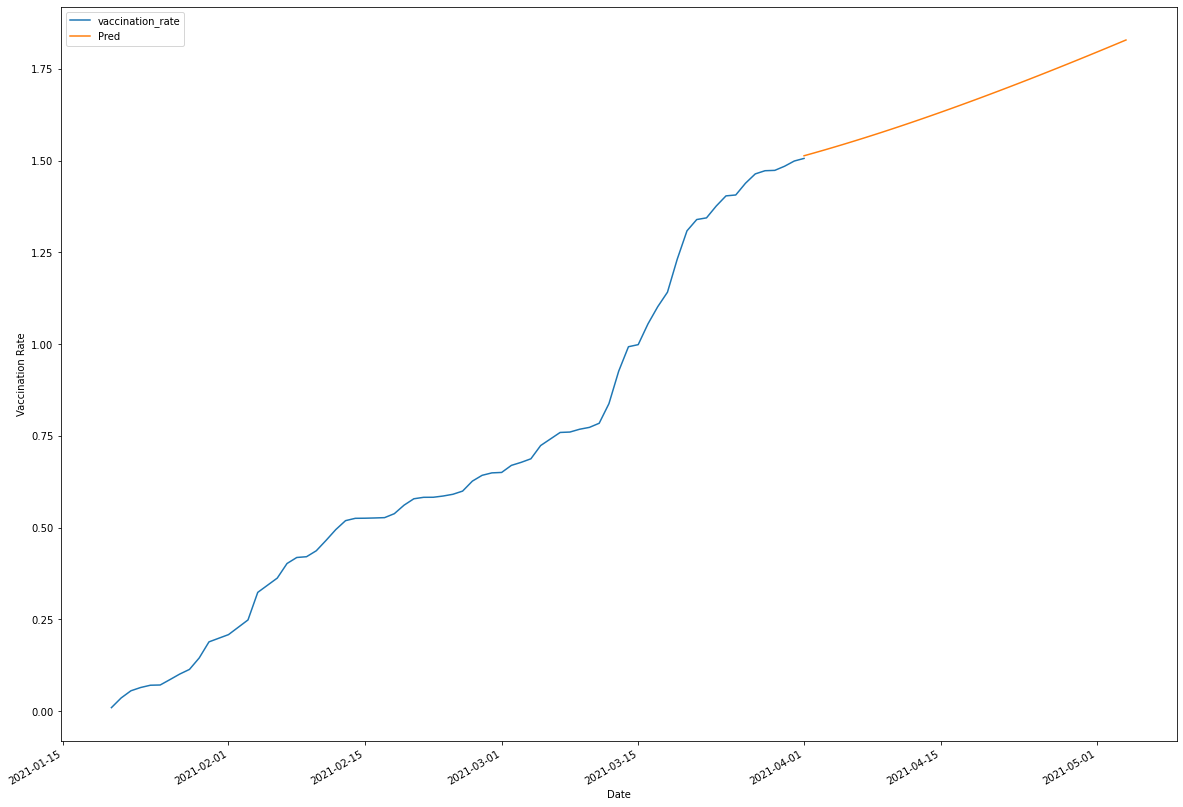

Argentina


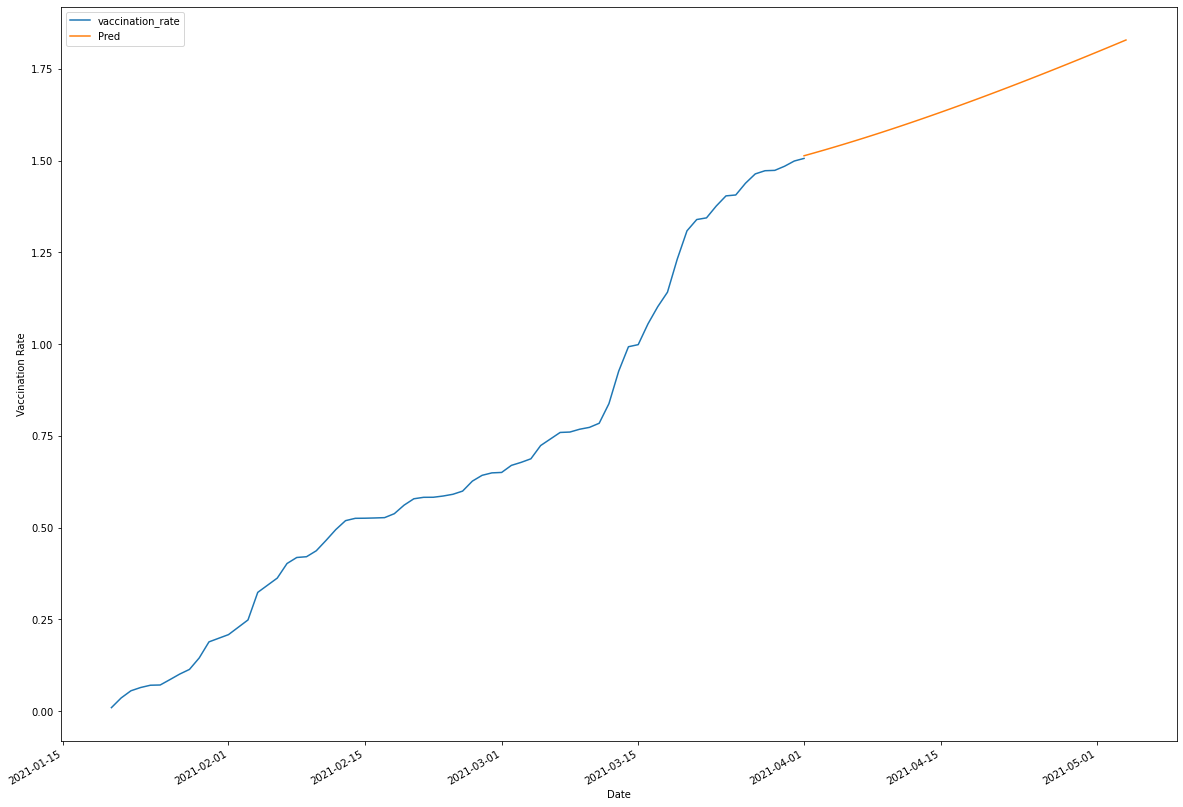

Argentina


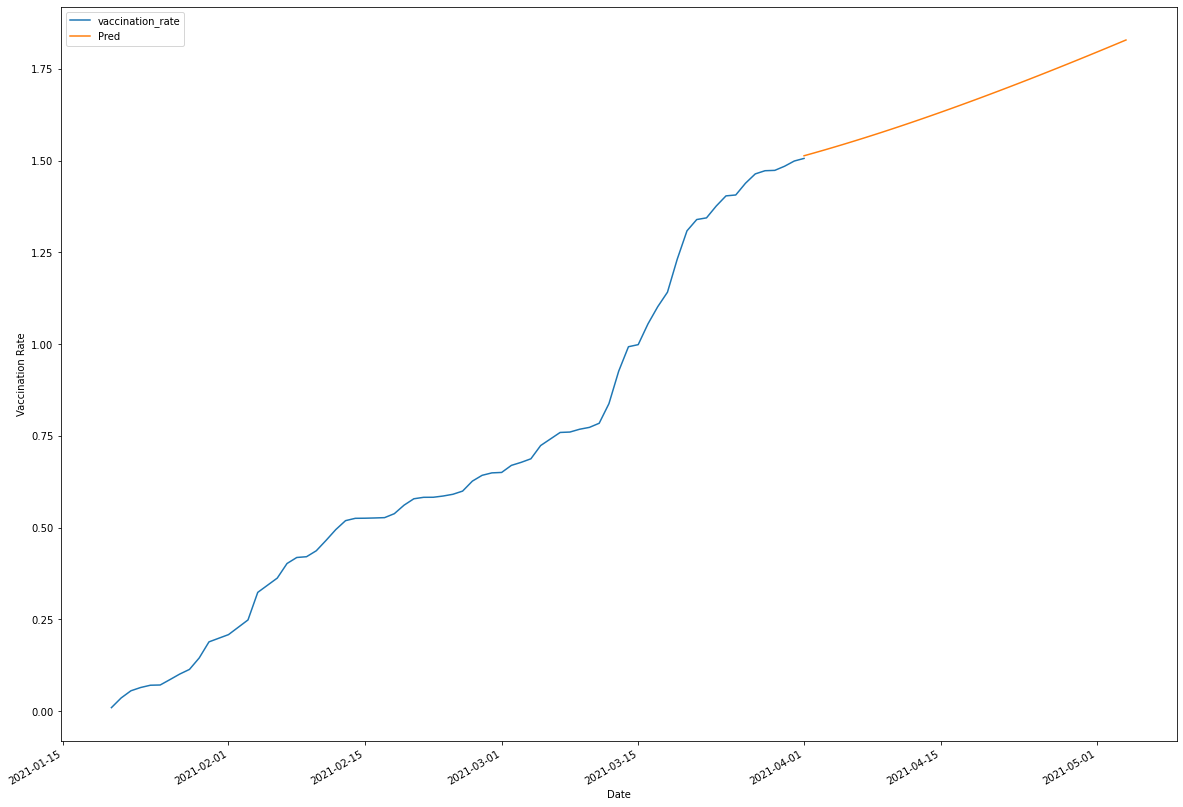

Argentina


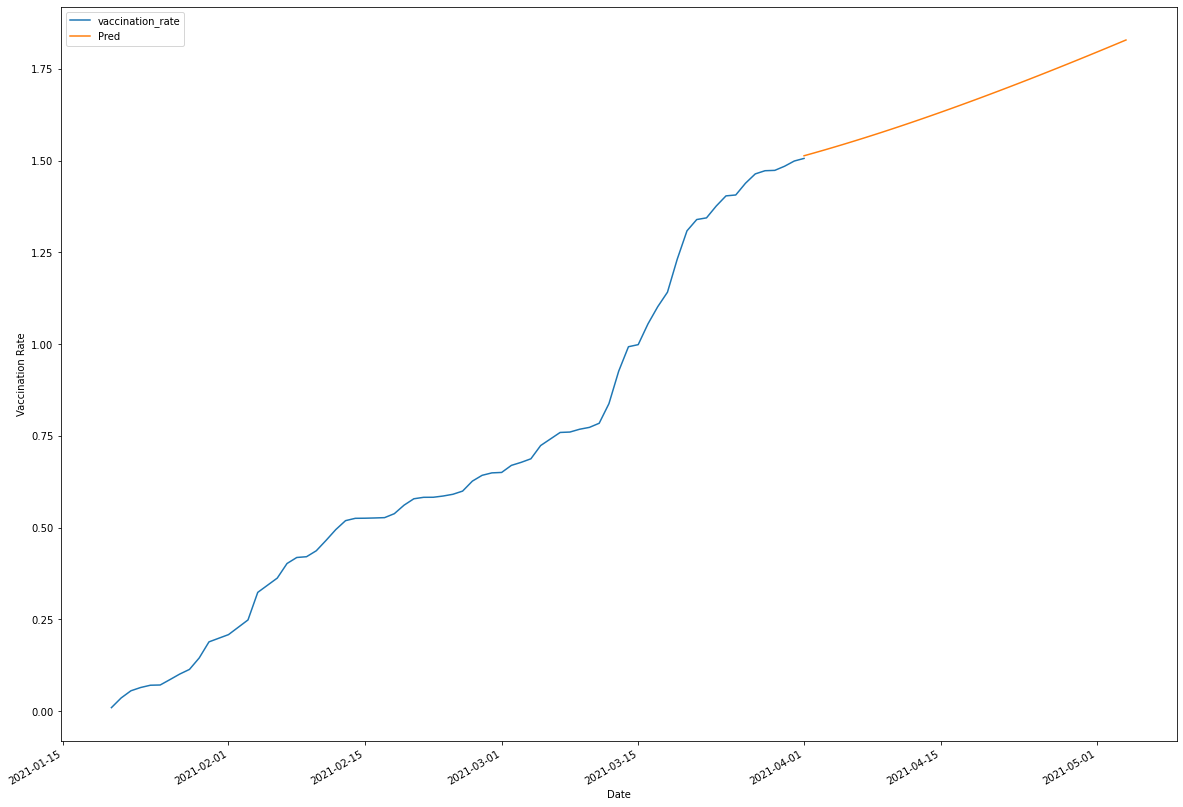

Argentina


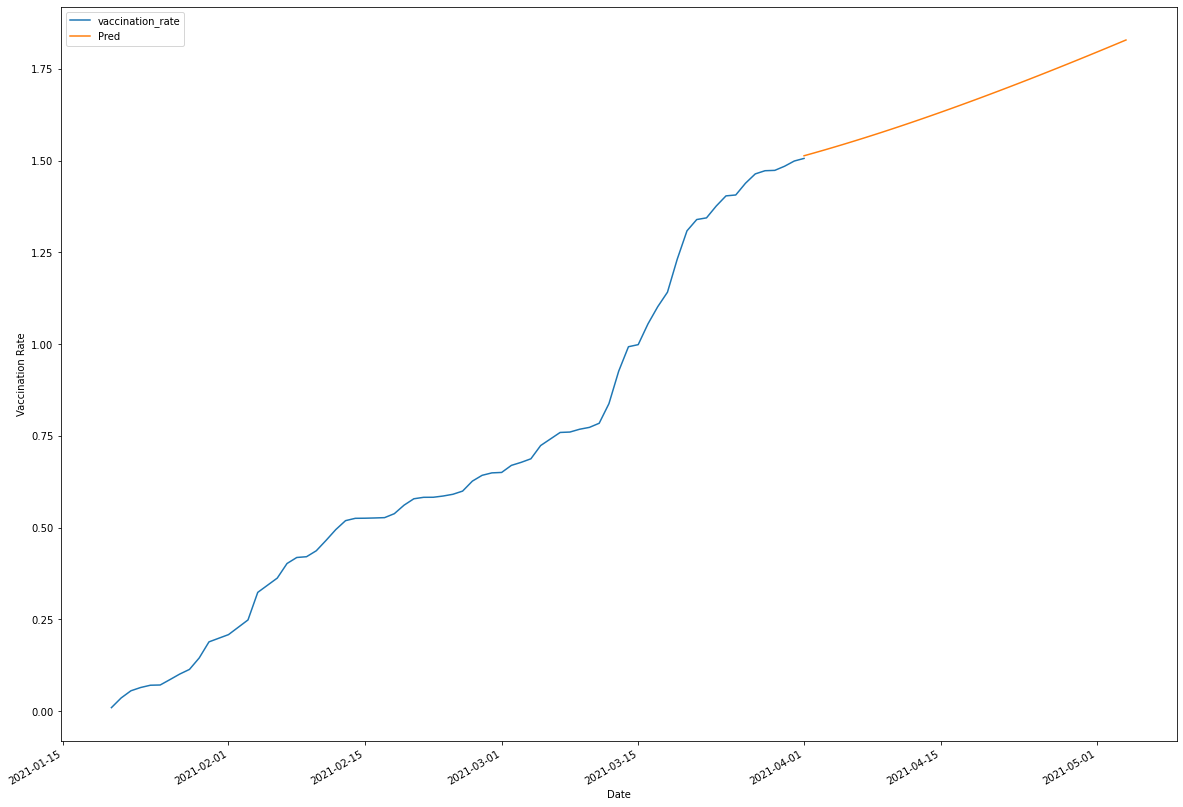

Argentina


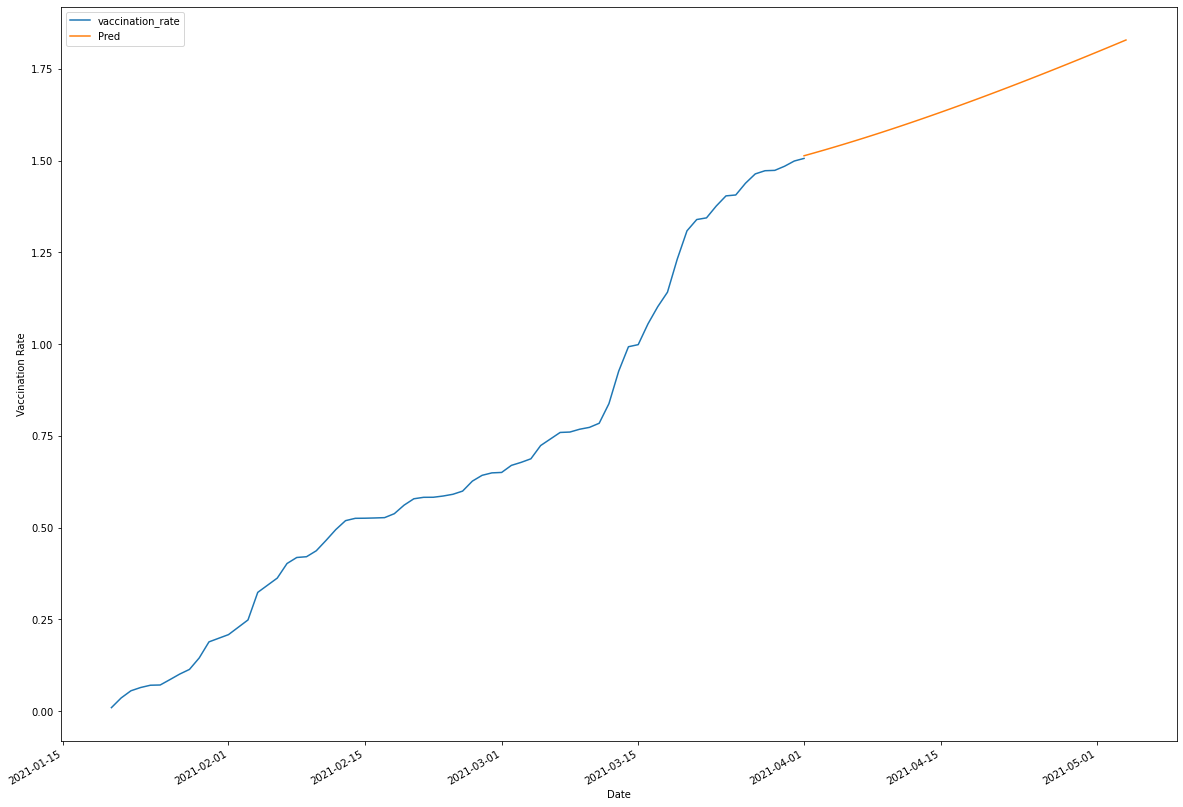

Argentina


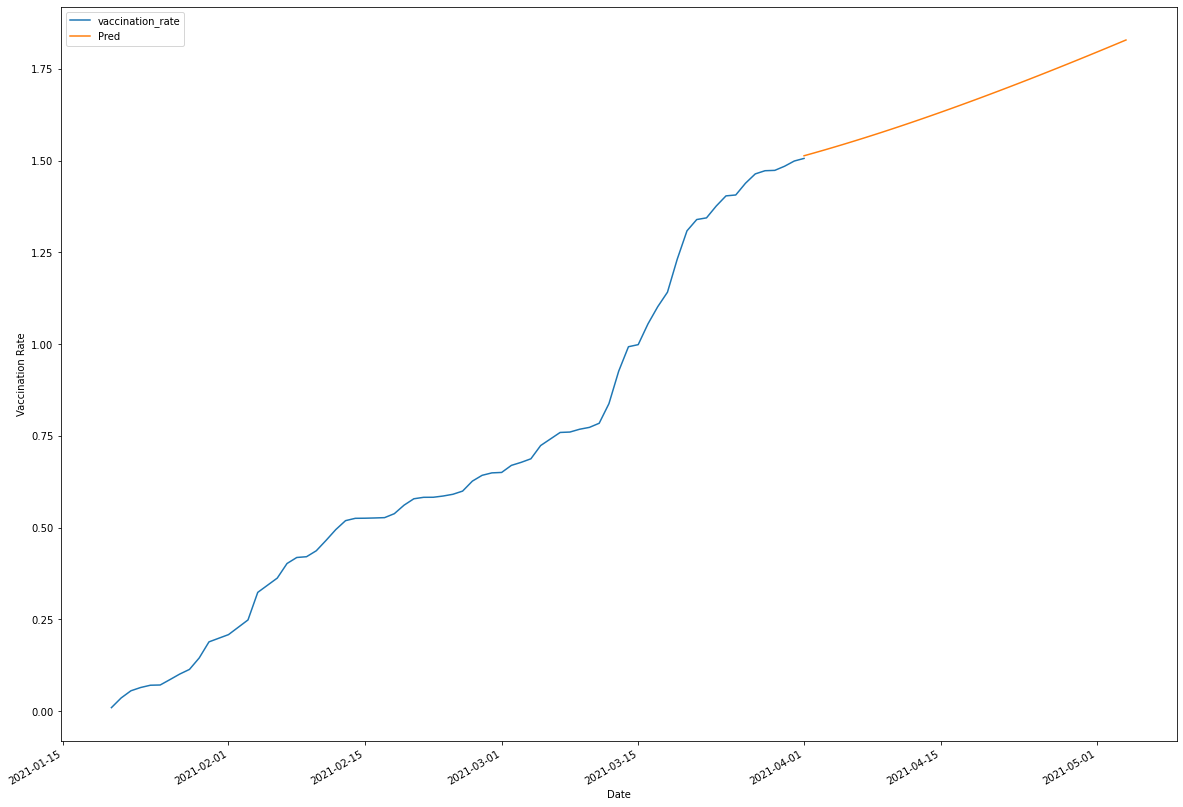

Argentina


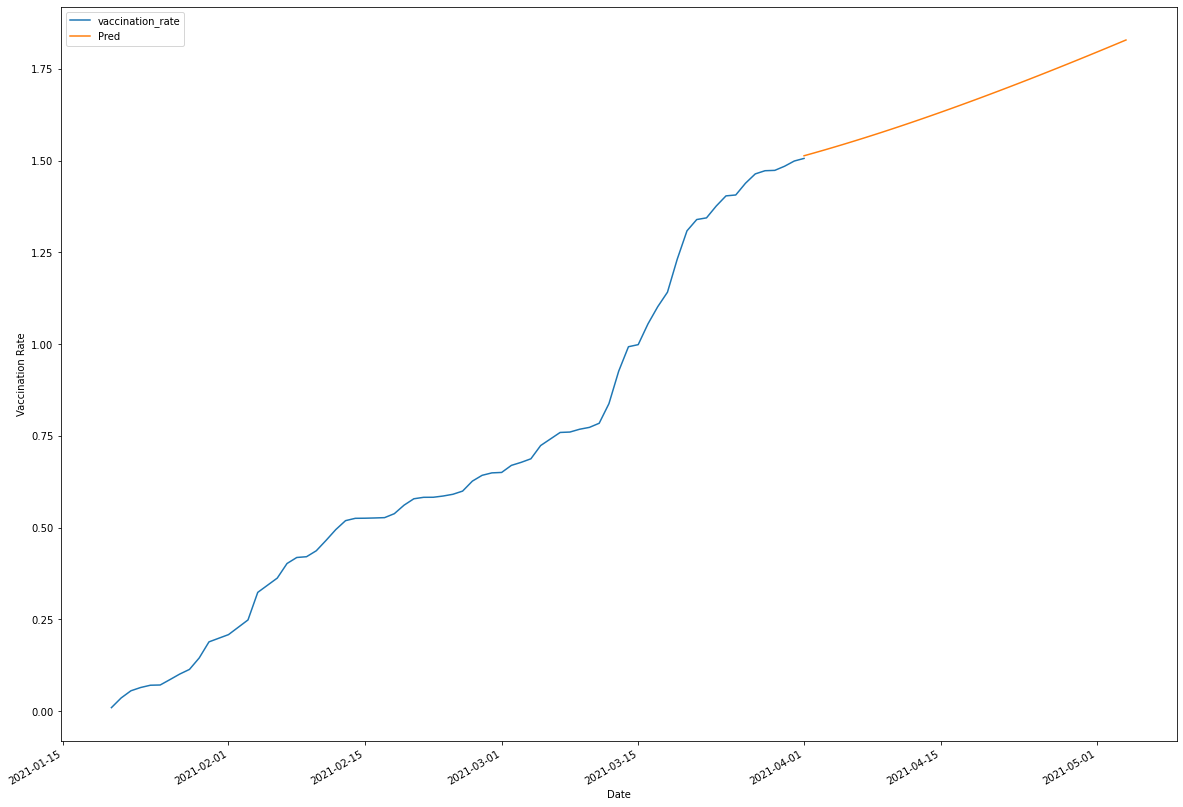

Argentina


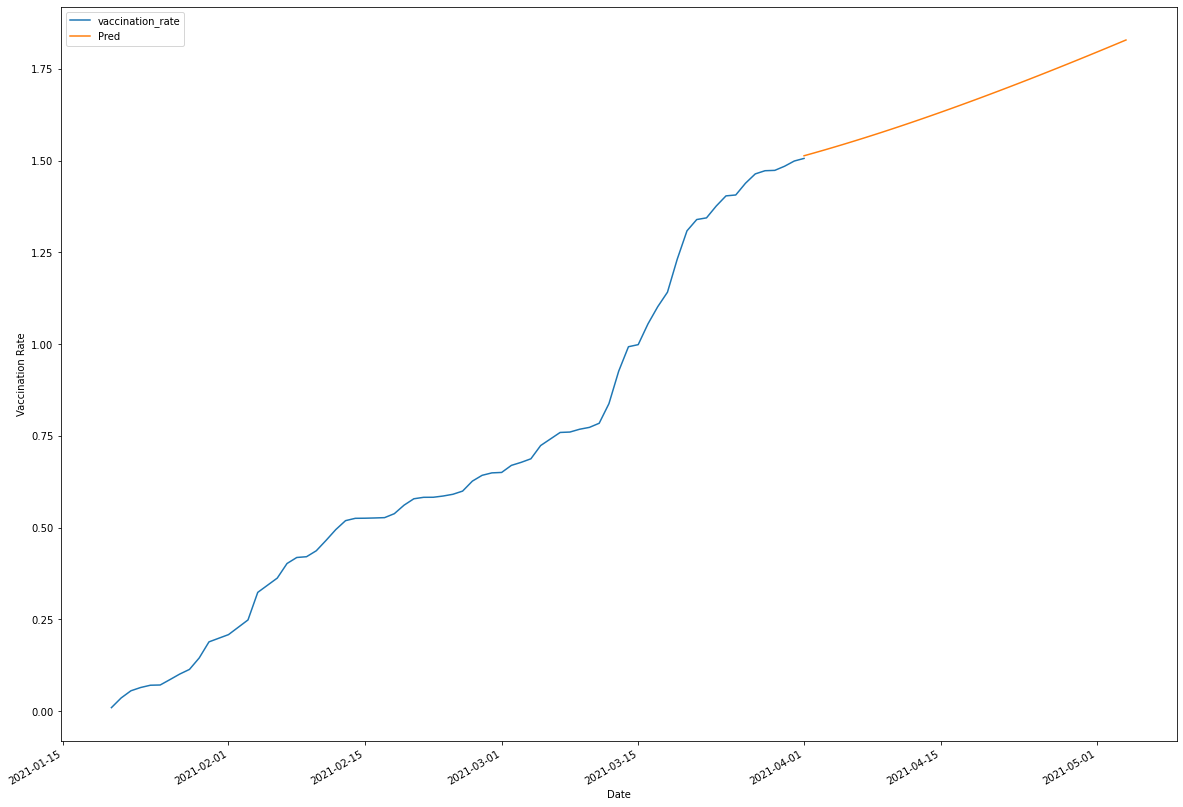

KeyboardInterrupt: 

In [49]:
for name, group in df_grouped:
    group['vaccination_rate'] = (group['people_fully_vaccinated']/group['population']) * 100
    group1 = group[group['people_fully_vaccinated'].notna()]
        
    if len(group1) >= 30:
        ts = group1[['date','vaccination_rate']]
        ts['date'] = pd.to_datetime(ts['date'])
        start_date = ts['date'].max()         
        ts.set_index('date', inplace = True)
        p_values = range(0, 5)
        d_values = range(0, 1)
        q_values = range(0, 2)

        Order = evaluate_models(ts, p_values, d_values, q_values)

        Actual = [x for x in ts.values]
        Predictions = list()

        for timestamp in range(len(ts.values)):
            ActualValue = ts.values[timestamp]
            Prediction = StartProducingARIMAForecastValues(Actual, Order)[0]
            model = StartProducingARIMAForecastValues(Actual, Order)[1]
            pred_uc = model.forecast(steps = round(len(ts)/2))[0]
            Range = pd.date_range(start = start_date, periods = len(pred_uc), freq='D')
            ts_pred = pd.DataFrame(data={'Pred': pred_uc}, index = Range)
            # Get confidence intervals of forecasts
    #             pred_ci = ts_pred['Pred'].conf_int()
            print(name[2])
            ax = ts.plot(label='observed' + name[2], figsize=(20, 15))
            ts_pred.plot(ax=ax, label='Forecast')
    #             ax.fill_between(pred_ci.index,
    #                             pred_ci.iloc[:, 0],
    #                             pred_ci.iloc[:, 1], color='k', alpha=.25)
            ax.set_xlabel('Date')
            ax.set_ylabel('Vaccination Rate')

            plt.legend()
            plt.show()

In [14]:
# dct_median = {}
# dct_vaccination_rate = {}
for name, group in df_grouped:
#     dct_median[name] = group.median(axis = 0)
#     dct_vaccination_rate[name] = group[group['vaccination_rate'].notna()]['vaccination_rate'].max()
    group['vaccination_rate'] = (group['people_fully_vaccinated']/group['population']) * 100
#     print(name, group[group['vaccination_rate'].notna()]['vaccination_rate'].max())
    group1 = group[group['people_fully_vaccinated'].notna()]
    if len(group1) >= 50:
        ts = group1[['date','vaccination_rate']]
        ts['date'] = pd.to_datetime(ts['date'])
        ts.set_index('date', inplace = True)
#         decomposition = seasonal_decompose(ts, freq = math.floor(len(ts)/2))
#         trend = decomposition.trend
#         seasonal = decomposition.seasonal
#         residual = decomposition.resid
#         plt.figure(figsize = (12,8))
#         plt.subplot(411)
#         plt.plot(np.log(ts), label = 'original'+'_'+name[2], color = 'blue')
#         plt.legend(loc = 'best')
#         plt.subplot(412)
#         plt.plot(trend, label = 'trend'+'_'+ name[2], color = 'blue')
#         plt.legend(loc = 'best')
#         plt.subplot(413)
#         plt.plot(seasonal, label = 'seasonality'+'_'+ name[2], color = 'blue')
#         plt.legend(loc = 'best')
#         plt.subplot(414)
#         plt.plot(residual, label = 'residuals'+'_'+ name[2], color = 'blue')
#         plt.legend(loc = 'best')
#         plt.tight_layout
#         rolling_mean = ts.rolling(window = 3, center = False).mean()
#         rolling_std = ts.rolling(window = 3, center = False).std()
        dftest = adfuller(ts['vaccination_rate'])
#         fig = plt.figure(figsize = (12,6))
#         original = plt.plot(ts, color = 'blue', label = 'original')
#         mean = plt.plot(rolling_mean, color = 'red', label = 'rolling mean')
#         std = plt.plot(rolling_std, color = 'green', label = 'rolling std')
#         plt.legend(loc = 'best')
#         plt.title(name[2])
#         plt.show(block = False)
        print('dicky fuller test' + '_' + name[2])
        dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#lags used', '#Observations'])
#         for key, value in dftest[4].items():
#             dfoutput['Critical Value (%s)'%key] = value
        print(dfoutput)
#         ts_diffs = ts.diff().dropna()
#     fig, ax = plt.subplots()
#     rcParams['figure.figsize'] = 12,8.27
#     plt.xticks(rotation=45)
#     g = group1[group1['date'].between(group1['date'].min(), '2021-04-01')]
#     ax.plot(g['date'], g['vaccination_rate'], marker = "o")
#     print(name)
#     plt.show()
#    
        X = ts.values
        size = int(len(X) * 0.66)
        train, test = X[0:size], X[size:len(X)]
        history = [x for x in train]
        predictions = list()
        # walk-forward validation
#         for t in range(len(test)):
#             model = ARIMA(history, order=(5,1,0))
#             model_fit = model.fit()
#             output = model_fit.forecast()
#             yhat = output[0]
#             predictions.append(yhat)
#             obs = test[t]
#             history.append(obs)
#             print('predicted=%f, expected=%f' % (yhat, obs))
#         # evaluate forecasts
#         rmse = sqrt(mean_squared_error(test, predictions))
#         print(name, 'Test RMSE: %.3f' % rmse)
#         # plot forecasts against actual outcomes
#         pyplot.plot(test)
#         pyplot.plot(predictions, color='red', label = name[2])
#         pyplot.show()

#         model = ARIMA(ts, order=(1, 1, 1))
#         model_fit = model.fit()
#         # make prediction
#         yhat = model_fit.predict(len(ts), len(ts), typ='levels')
#         print(name, yhat)
#         print(name, len(group['people_fully_vaccinated']))
#     print(name, display(group[group['people_fully_vaccinated'] == group['people_fully_vaccinated'].max()][['date','people_fully_vaccinated']]), group['date'].max())

dicky fuller test_Argentina
Test Statistic    -0.197709
p-value            0.938794
#lags used         8.000000
#Observations     59.000000
dtype: float64
dicky fuller test_Austria
Test Statistic    -0.397168
p-value            0.910571
#lags used         8.000000
#Observations     67.000000
dtype: float64
dicky fuller test_Belgium
Test Statistic    -2.032387
p-value            0.272555
#lags used         8.000000
#Observations     64.000000
dtype: float64
dicky fuller test_Bulgaria
Test Statistic     3.39314
p-value            1.00000
#lags used        12.00000
#Observations     61.00000
dtype: float64
dicky fuller test_Brazil
Test Statistic     1.353128
p-value            0.996890
#lags used         2.000000
#Observations     47.000000
dtype: float64
dicky fuller test_Canada
Test Statistic    -0.77284
p-value            0.82697
#lags used         3.00000
#Observations     81.00000
dtype: float64
dicky fuller test_Chile
Test Statistic     2.216455
p-value            0.998896
#lags use